<div style="border:solid green 2px; padding: 20px">
<b>Hello, Margaret!</b>

My name is Grigoriy Gusarov and I'm going to review your project.

My main goal is not to show that any mistakes have been made somewhere, but to share my experience that will help you in your further work. Further in the file you can see my comments, try to take them into account when performing the next tasks. **Please, don't delete them.**


You can find my comments in <font color='green'>green</font>, <font color='orange'>yellow</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

    
Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:
    
<div class="alert alert-info"> <b>Student's comment:</b> For example like this.</div>

### <font color='orange'>General feedback</font>
Thank you for sending your project.  It's clear that a lot of work has been put into it. Unfortunately, your project is not quite ready for the review. Please, fix code issue in the 166-th cell.

<div class="alert alert-info"> <b>Student's comment:</b> 
    Hello Grigoriy! :) thank you for checking my work. I hope I fixed it, can't really see as it does not show, but hope you can see it.
</div>

**Update**:<br>
Thank you for the update! I liked you your plotly charts, well done. There are virtually no isuues and they are related only to the formatting of the work.

**Update**:<br>
Thank you for the update! Good job, just pay attention to mean rows adding in retention rate, LTV and ROMI metrics heatmaps. I've left you example below.

**Update**:<br>
Good job, your project has been accepted!

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Additional links:
    <ul>
        <li>Quantitative Economics with Python: <a>https://quantecon.org/python-lectures/</a></li>
        <li>Style Pandas Dataframe Like a Master: <a>https://towardsdatascience.com/style-pandas-dataframe-like-a-master-6b02bf6468b0</a></li>
        <li>Lifetime value in Python : <a>https://github.com/CamDavidsonPilon/lifetimes</a></li>
    </ul>
</div>

<div class="alert alert-info"> <b>Student's comment:</b> 
    Hello again! :) thank you for the links.
</div>

---

**Project Description**

We'll be analyzing the business metrics of Yandex.Afisha, an app that helps users find out about events like movie showings, exhibitions, gigs, etc. and buy tickets. Our goal will be to help marketing experts from Yandex.Afisha make effective investments in marketing.

Our task is to help optimize marketing expenses.<br><br>
We have:<br>

- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics


We are going to study:<br>

- How people use the product 
- When they start to buy
- How much money each customer brings
- When they pay off

[**STEP 1**. Download and prepare data for analysis:](#download)<br><br>
[- Store the data on visits, orders, and expenses in variables.](#variables)<br>
[- Optimize the data for analysis.](#optimize)<br>
[- Make sure each column contains the correct data type.](#type)<br><br>
[**STEP 2**. Make reports and calculate metrics:](#metrics)<br><br>
[**Product**](#product)<br>
[- How many people use it every day, week and month?](#howmany)<br>
[- How many sessions are there per day? (One user might have more than one session).](#sessions)<br>
[-What is the length of each session?](#length)<br>
[- How often do users come back?](#comeback)<br><br>
[**Sales**](#sales)<br>
[- When do people start buying?](#when)<br>
[- How many orders do they make during a given period of time?](#orders)<br>
[- What is the average purchase size?](#size)<br>
[- How much money do they bring? (LTV)](#ltv)<br><br>
[**Marketing**](#marketing)<br>
[- How much money was spent? Overall/per source/over time](#money)<br>
[- How much did customer acquisition from each of the sources cost?](#cost)<br>
[- How worthwhile where the investments? (ROI)](#roi)<br><br>
[**STEP 3**. Write a conclusion: advise marketing experts how much money to invest and where.](#conclusion)<br><br>
[**Full report**](#report)

<div class="alert alert-success">
<b>Reviewer's comment:</b> Nice introduction! Great that you have added so detailed interactive table of content, it's very useful tool for the project navigation.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st
import plotly.graph_objects as go
from pandas import DataFrame

**STEP 1**. Download and prepare data for analysis:<a id='download'></a>

**Store the data on visits, orders, and expenses in variables.**<a id='variables'></a>

In [2]:
try:
    visits = pd.read_csv('visits_log_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')

visits.head()

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [3]:
try:
    orders = pd.read_csv('orders_log_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv')

orders.head()

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [4]:
try:
    costs = pd.read_csv('costs_us.csv')
except:
    costs = pd.read_csv('/datasets/costs_us.csv')

costs.head()

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

**Visits:**

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
visits.sample()

Device               End Ts  Source Id             Start Ts  \
143386  desktop  2018-03-14 15:16:00          3  2018-03-14 15:08:00   

                         Uid  
143386  13920407093394679471

In [7]:
visits.describe()

Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19

In [8]:
visits.describe(include='object')

Device               End Ts             Start Ts
count    359400               359400               359400
unique        2               224760               224303
top     desktop  2017-11-24 16:51:00  2017-11-24 16:06:00
freq     262567                   23                   19

In [9]:
visits.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [10]:
visits.shape

(359400, 5)

In [11]:
visits.tail()

Device               End Ts  Source Id             Start Ts  \
359395  desktop  2017-07-29 19:07:19          2  2017-07-29 19:07:00   
359396    touch  2018-01-25 17:38:19          1  2018-01-25 17:38:00   
359397  desktop  2018-03-03 10:12:19          4  2018-03-03 10:12:00   
359398  desktop  2017-11-02 10:12:19          5  2017-11-02 10:12:00   
359399    touch  2017-09-10 13:13:19          2  2017-09-10 13:13:00   

                         Uid  
359395  18363291481961487539  
359396  18370831553019119586  
359397  18387297585500748294  
359398  18388616944624776485  
359399  18396128934054549559

In [12]:
for i in visits.columns:
    print(i, len(visits[visits[i]==0]))

Device 0
End Ts 0
Source Id 0
Start Ts 0
Uid 0


In [13]:
visits.duplicated().sum()

0

**Conclusion:** The data has 359400 rows and 5 columns. Values in columns 'End Ts' and 'Start Ts' need to be converted to datetime type. Column 'Device' can be converted to 'category' type. There are no missing values, no 0s and no duplicates.

**Orders:**

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [15]:
orders.sample()

Buy Ts  Revenue                   Uid
28048  2018-01-04 15:37:00     3.67  18046803267684131852

In [16]:
orders.describe()

Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19

In [17]:
orders.describe(include='object')

Buy Ts
count                 50415
unique                45991
top     2018-05-31 10:13:00
freq                      9

In [18]:
orders.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [19]:
orders.shape

(50415, 3)

In [20]:
orders.tail()

Buy Ts  Revenue                   Uid
50410  2018-05-31 23:50:00     4.64  12296626599487328624
50411  2018-05-31 23:50:00     5.80  11369640365507475976
50412  2018-05-31 23:54:00     0.30   1786462140797698849
50413  2018-05-31 23:56:00     3.67   3993697860786194247
50414  2018-06-01 00:02:00     3.42     83872787173869366

In [21]:
for i in orders.columns:
    print(i, len(orders[orders[i]==0]))

Buy Ts 0
Revenue 51
Uid 0


In [22]:
orders.duplicated().sum()

0

**Conclusion:** The data has 50415 rows and 3 columns. Values in 'Revenue' column can be converted to float16 to save space, values in 'Buy Ts' need to be converted to 'datetime' type. There are no missing values and no duplicates. There are 51 zeroes in 'Revenue' column. That could be due to human error or export error. It is unlikely to be actually 0 if the order was placed. There are also suspiciously high values in revenue columns which could be outliers.

**Costs:**

In [23]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [24]:
costs.sample()

source_id          dt   costs
893          3  2017-11-15  301.45

In [25]:
costs.describe()

source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000

In [26]:
costs.describe(include='object')

dt
count         2542
unique         364
top     2017-08-05
freq             7

In [27]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [28]:
costs.shape

(2542, 3)

In [29]:
costs.tail()

source_id          dt  costs
2537         10  2018-05-27   9.92
2538         10  2018-05-28  21.26
2539         10  2018-05-29  11.32
2540         10  2018-05-30  33.15
2541         10  2018-05-31  17.60

In [30]:
for i in costs.columns:
    print(i, len(costs[costs[i]==0]))

source_id 0
dt 0
costs 0


In [31]:
costs.duplicated().sum()

0

Users that did not make any purchase:

**Conclusion:** The data has 2542 rows and 3 columns. Values in 'dt' column need to be changed to 'datetime' type, values in 'costs' column can be changed to 'float16' type to save space. There are no missing values, no 0s and no duplicates. We need to check 'costs' column for outliers.

In [32]:
len(set(visits['Uid'].unique()) - set(orders['Uid'].unique()))

191646

Users that exist in both datasets:

In [33]:
len(set(visits['Uid'].unique()).intersection(set(orders['Uid'].unique())))

36523

**Optimize the data for analysis.**<a id='optimize'></a>

**Dropping 0s** in orders.revenue since it will not interfere with analysis:

In [34]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format='%Y-%m-%dT%H:%M:%S')
orders = orders.query('Revenue > 0')
for i in orders.columns:
    print(i, len(orders[orders[i]==0]))

Buy Ts 0
Revenue 0
Uid 0


**Creating new df without outliers** for orders.revenue:

In [35]:
Q1_revenue = orders['Revenue'].quantile(0.25)
Q3_revenue = orders['Revenue'].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue
higher_whisker_for_orders = 1.5*IQR_revenue + Q3_revenue
higher_whisker_for_orders

10.395

<div class="alert alert-danger">
<b>Reviewer's comment:</b> Hardcoded constant in the query. Please, use variable instead of it.
</div>

<div class="alert alert-info"> <b>Student's comment:</b> 
    Like this?
</div>

<div class="alert alert-warning">
<b>Reviewer's comment v2: </b> No, you need to find a way to store value (10.395) inside variable :)
</div>

In [36]:
orders_wo_outliers = orders.query('Revenue < 10')
orders_wo_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46199 entries, 1 to 50414
Data columns (total 3 columns):
Buy Ts     46199 non-null datetime64[ns]
Revenue    46199 non-null float64
Uid        46199 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.4 MB


**Creating new df without outliers** for costs.costs:

In [37]:
Q1_costs = costs['costs'].quantile(.25)
Q3_costs = costs['costs'].quantile(.75)
IQR_costs = Q3_costs - Q1_costs
higher_whisker_for_costs = IQR_costs*1.5 + Q3_costs
higher_whisker_for_costs

392.245

<div class="alert alert-danger">
<b>Reviewer's comment:</b> The same problem
</div>

<div class="alert alert-info"> <b>Student's comment:</b> 
    Hope I got it right.
</div>

In [38]:
costs_wo_outliers = costs.query('costs < 392')

Making column names **lowecase** for easier work with data:

In [39]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()

**Make sure each column contains the correct data type.**<a id='type'></a>

In [40]:
visits['end ts'] = pd.to_datetime(visits['end ts'], format='%Y-%m-%dT%H:%M:%S')
visits['start ts'] = pd.to_datetime(visits['start ts'], format='%Y-%m-%dT%H:%M:%S')
visits['device'] = visits['device'].astype('category')

In [41]:
orders['revenue'] = orders['revenue'].astype('float16')

In [42]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')
costs['costs'] = costs['costs'].astype('float16')

**Conclusion:** We dropped 0s in revenue column in orders table since it is most likely a mistake and dropping them will not interfere with analysis. We turned names of the columns to lowercase. We changed data type in device column to category to save space and all the relevant columns to datetime format. 

<div class="alert alert-success">
<b>Reviewer's comment: </b> Excellent job, you've covered all necessary data preparations steps and even payed attention to the outliers filtering.
</div>

**STEP 2**. Make reports and calculate metrics:<a id='metrics'></a>

**Product**<a id='product'></a>

In [43]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end ts       359400 non-null datetime64[ns]
source id    359400 non-null int64
start ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


**How many people use it every day, week and month?**<a id='howmany'></a>

In [44]:
#visits['session_year'] = visits['start ts'].dt.year
#visits['session_year'] = pd.to_datetime(visits['start ts']).dt.to_period('Y')
visits['session_year'] = visits['start ts'].astype('datetime64[Y]')
#visits['session_month'] = visits['start ts'].dt.month
#visits['session_month'] = pd.to_datetime(visits['start ts']).dt.to_period('M')
visits['session_month'] = visits['start ts'].astype('datetime64[M]')
#visits['session_week'] = visits['start ts'].dt.week
#visits['session_week'] = pd.to_datetime(visits['start ts']).dt.to_period('W')
visits['session_week'] = visits['start ts'].astype('datetime64[W]')
visits['session_date'] = visits['start ts'].dt.date
visits['month_year'] = pd.to_datetime(visits['start ts']).dt.to_period('M')
mau = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).reset_index()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()
mau_month_year = visits.groupby(['session_year', 'month_year']).agg({'uid':'nunique'}).reset_index()
mau_month_year_total = visits.groupby(['session_year', 'month_year']).agg({'uid':'nunique'}).mean()
dau = visits.groupby(['session_date']).agg({'uid':'nunique'}).reset_index()
dau_total = visits.groupby(['session_date']).agg({'uid':'nunique'}).mean()
wau = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).reset_index()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean()
sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100
print('Sticky WAU:', float(sticky_wau))
print('Sticky MAU:', float(sticky_mau))

Sticky WAU: 16.151540637823956
Sticky MAU: 3.908969652437603


In [45]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 10 columns):
device           359400 non-null category
end ts           359400 non-null datetime64[ns]
source id        359400 non-null int64
start ts         359400 non-null datetime64[ns]
uid              359400 non-null uint64
session_year     359400 non-null datetime64[ns]
session_month    359400 non-null datetime64[ns]
session_week     359400 non-null datetime64[ns]
session_date     359400 non-null object
month_year       359400 non-null period[M]
dtypes: category(1), datetime64[ns](5), int64(1), object(1), period[M](1), uint64(1)
memory usage: 25.0+ MB


<div class="alert alert-warning">
<b>Reviewer's comment:</b> Please, pay attention to how you extract timestamps. It's safer to do it with <code>datetime64[Y]</code>, <code>datetime64[M]</code>, <code>datetime64[W]</code>. This gives you not just a number, but a complete date. This is important because even in this project, the data is slightly out of the time frame of one year. And if we were looking at multiple years of data, all the week and month numbers would get mixed up.
</div>

<div class="alert alert-info"> <b>Student's comment:</b> 
    Done.
</div>

<div class="alert alert-success">
<b>Reviewer's comment v2:</b> 👍
</div>


**Conclusion:** The percentage of users who are still using the site after one week is 16. The percentage of users who are still using the site after one month is 4.

Line graph for DAU:

In [46]:
dau_total

uid    907.991758
dtype: float64

In [47]:
wau_total

uid    5621.703704
dtype: float64

In [48]:
users_per_week = wau.sort_values(by='uid', ascending=False)
users_per_week.head()

session_year session_week    uid
25   2017-01-01   2017-11-23  10716
27   2017-01-01   2017-12-07   8575
43   2018-01-01   2018-03-22   8486
24   2017-01-01   2017-11-16   8294
37   2018-01-01   2018-02-08   8218

In [49]:
users_per_week.tail()

session_year session_week   uid
2    2017-01-01   2017-06-15  2844
10   2017-01-01   2017-08-10  2658
8    2017-01-01   2017-07-27  2505
9    2017-01-01   2017-08-03  2343
53   2018-01-01   2018-05-31  1997

In [50]:
dau.reset_index()
dau.head()

session_date  uid
0   2017-06-01  605
1   2017-06-02  608
2   2017-06-03  445
3   2017-06-04  476
4   2017-06-05  820

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Please, store all your imports in one, separate cell at the begginning of your project.
</div>

<div class="alert alert-info"> <b>Student's comment:</b> 
    Sorry about this :) For some reason, in previous projects the graph would not show unless I repeat imports in every cell, I thought it depends on whether the reviewer is checking my project on the platform or locally, but was not totally sure about it. But I deleted all the repeated ones.
</div>

<div class="alert alert-success">
<b>Reviewer's comment v2:</b> Okay, thank you!
</div>

In [51]:
session_date = []
session_date = dau['session_date']
uid = []
uid = dau['uid']

#plt.figure(figsize=(20,10))
naufig = go.Figure(data=go.Scatter(x=session_date, y=uid))
naufig.update_layout(autosize=False,
                  width=1000,
                  height=500,
                  title='The number of daily active (unique) users',
                  xaxis_title = 'Session Date',
                  yaxis_title = 'Unique Users')
naufig.show()

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Note, that <code>plt.figure(figsize=(20,10))</code> works only with chart with matplotlib backend. How to set plotly chart size: <a>https://plotly.com/python/setting-graph-size/</a>
</div>

<div class="alert alert-info"> <b>Student's comment:</b> 
    Hope it's correct now.
</div>

**Conclusion:** We can see a sharp peak in daily active usage on the 24th of November 2017 with 3319 active users and a substantial fall on the 30th of March 2018 with 131 active users. Other than that, daily usage appears higher during colder months than during warmer months. 

Bar graph for MAU:

In [52]:
mau_total

uid    23228.416667
dtype: float64

In [53]:
mau.session_year.unique()

array(['2017-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [54]:
mau_month_year.month_year.unique()

<PeriodArray>
['2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
 '2018-01', '2018-02', '2018-03', '2018-04', '2018-05']
Length: 12, dtype: period[M]

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Please, don't repeat imports.
</div>

<div class="alert alert-info"> <b>Student's comment:</b> 
    Ok :)
</div>

In [55]:
session_month = []
session_month = mau['session_month']
uid = []
uid = mau['uid']
nfig = go.Figure(data=[go.Bar(x=session_month, y=uid, text=uid, textposition='auto')])
nfig.update_layout(title='The number of monthly active (unique) users in 2017-2018',
                 xaxis_title = 'Session Month',
                 yaxis_title = 'Unique Users',
                 xaxis=dict
                 (tickmode = 'array',
                  tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                  ticktext = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'])
                 )
nfig.show()

**Conclusion:** This bar graph confirms the observations taken from daily active users line graph. Colder months evidently correlate with higher number of users of the site. 

<div class="alert alert-success">
<b>Reviewer's comment: </b> Excellent, all metrics are right!
</div>


**How many sessions are there per day? (One user might have more than one session).**<a id='sessions'></a>

In [56]:
ses_per_day = visits.groupby(['session_date']).agg({'uid':'count'}).reset_index()
ses_per_day.mean()

uid    987.362637
dtype: float64

In [57]:
ses_per_day_desktop = visits.query('device == "desktop"').groupby(['session_date']).agg({'uid':'count'}).reset_index()
ses_per_day_desktop.mean()

uid    721.337912
dtype: float64

In [58]:
ses_per_day_touch = visits.query('device == "touch"').groupby(['session_date']).agg({'uid':'count'}).reset_index()
ses_per_day_touch.mean()

uid    266.757576
dtype: float64

In [59]:
ses_pd = []
ses_pd = ses_per_day['session_date']
uid = []
uid = ses_per_day['uid']
uid_desktop = []
uid_desktop = ses_per_day_desktop['uid']
uid_touch = []
uid_touch = ses_per_day_touch['uid']

nsfig = go.Figure(data=[go.Scatter(x=ses_pd, y=uid, name='total'),
                      go.Scatter(x=ses_pd, y=uid_desktop, name='desktop'),
                      go.Scatter(x=ses_pd, y=uid_touch, name='touch')])
nsfig.update_layout(title='The number of sessions per day by device:',
                 xaxis_title = 'Session Date',
                 yaxis_title = 'Unique Users')
nsfig.show()

**Conclusion:** The difference between touch and desktop is not very dramatic, but still quite noticable. That could be explained by people searching for information about cultural events during their lunch breaks at work where they use desktop computers. 

<div class="alert alert-success">
<b>Reviewer's comment: </b> 👍
</div>


**Average number of sessions per user per day:**

In [60]:
ses_per_day = ses_per_day.rename(columns={'uid':'number_of_users'})
ses_per_day.head()

session_date  number_of_users
0   2017-06-01              664
1   2017-06-02              658
2   2017-06-03              477
3   2017-06-04              510
4   2017-06-05              893

In [61]:
dau = dau.rename(columns={'uid':'number_of_unique_users'})
dau.head()

session_date  number_of_unique_users
0   2017-06-01                     605
1   2017-06-02                     608
2   2017-06-03                     445
3   2017-06-04                     476
4   2017-06-05                     820

In [62]:
avg_numb_users = dau.merge(ses_per_day)
avg_numb_users.head()

session_date  number_of_unique_users  number_of_users
0   2017-06-01                     605              664
1   2017-06-02                     608              658
2   2017-06-03                     445              477
3   2017-06-04                     476              510
4   2017-06-05                     820              893

In [63]:
avg_numb_users['average_n_sessions_per_user'] = avg_numb_users['number_of_users'] / avg_numb_users['number_of_unique_users']
avg_numb_users.head()

session_date  number_of_unique_users  number_of_users  \
0   2017-06-01                     605              664   
1   2017-06-02                     608              658   
2   2017-06-03                     445              477   
3   2017-06-04                     476              510   
4   2017-06-05                     820              893   

   average_n_sessions_per_user  
0                     1.097521  
1                     1.082237  
2                     1.071910  
3                     1.071429  
4                     1.089024

In [64]:
date = []
date = avg_numb_users['session_date']
avg_ses_per_user = []
avg_ses_per_user = avg_numb_users['average_n_sessions_per_user']

sfig = go.Figure(data=go.Scatter(x=date, y=avg_ses_per_user))
sfig.update_layout(title='The average number of sessions per user per day:',
                 xaxis_title = 'Session Date',
                 yaxis_title = 'Number of sessions')
sfig.show()

**Conclusion:** This graph shows that people mostly use the website once a day. 

<div class="alert alert-success">
<b>Reviewer's comment: </b> Yes, you are right.
</div>

**What is the length of each session?**<a id='length'></a>

Mode value for session_duration_sec column: 0    60
dtype: int64


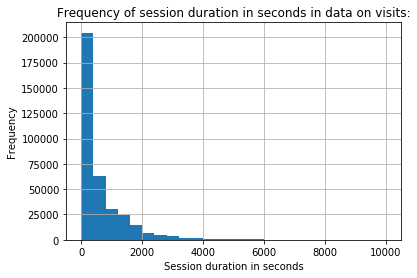

In [65]:
visits['session_duration_sec'] = (visits['end ts'] - visits['start ts']).dt.seconds
visits['session_duration_sec'].hist(bins=25, range=(0, 10000))
plt.title('Frequency of session duration in seconds in data on visits:')
plt.xlabel('Session duration in seconds')
plt.ylabel('Frequency')

asl = visits['session_duration_sec'].mode()
print("Mode value for session_duration_sec column:", asl)

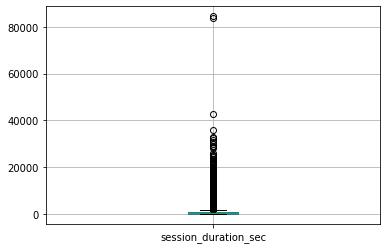

In [66]:
visits.boxplot('session_duration_sec')
plt.show()

In [67]:
visits['session_duration_sec'].max()

84480

<div class="alert alert-success">
<b>Reviewer's comment: </b> Good, mode() is te best average metric in this case.
</div>

**Conclusion:** Most sessions last around 60 seconds. The histogram shows that sessions over an hour (3600) are very rare.

In [68]:
visits.device.value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [69]:
dur_per_day = visits.groupby(['session_date']).agg({'session_duration_sec':'mean'}).reset_index()
dur_per_day.median()

session_duration_sec    622.301451
dtype: float64

In [70]:
dur_per_day_desktop = visits.query('device == "desktop"').groupby(['session_date']).agg({'session_duration_sec':'mean'}).reset_index()
dur_per_day_desktop.mean()

session_duration_sec    681.509732
dtype: float64

In [71]:
dur_per_day_touch = visits.query('device == "touch"').groupby(['session_date']).agg({'session_duration_sec':'mean'}).reset_index()
dur_per_day_touch.mean()

session_duration_sec    463.667227
dtype: float64

In [72]:
dates = []
dates = dur_per_day['session_date']
duration = []
duration = dur_per_day['session_duration_sec']
duration_desktop = dur_per_day_desktop['session_duration_sec']
duration_touch = dur_per_day_touch['session_duration_sec']


dfig = go.Figure(data = [go.Scatter(x=dates, y=duration, name='total'),
                        go.Scatter(x=dates, y=duration_desktop,name='desktop'),
                        go.Scatter(x=dates, y=duration_touch, name='touch')])
dfig.update_layout(title='Average duration of sessions per day by devices:',
                 xaxis_title = 'Session Date',
                 yaxis_title = 'Average duration in seconds')
dfig.show()

**Conclusion:** Unfortunately if we use median values for this graph they are not very representative. At the same time, using mean is not very accurate also, judging by the histogram. Anyway we can see that the average session duration is higher for desktop which confirms our previous observations.

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Okay, but mean()  metric are useful only for normal distributions. So, here it's very far from accurate results. But anyway the  chart is beautiful :)
</div>

<div class="alert alert-info"> <b>Student's comment:</b> 
    Let me try with median...
</div>

In [73]:
dur_per_day_median = visits.groupby(['session_date']).agg({'session_duration_sec':'median'}).reset_index()
dur_per_day_desktop_median = visits.query('device == "desktop"').groupby(['session_date']).agg({'session_duration_sec':'median'}).reset_index()
dur_per_day_touch_median = visits.query('device == "touch"').groupby(['session_date']).agg({'session_duration_sec':'median'}).reset_index()

dates_median = []
dates_median = dur_per_day_median['session_date']
duration_median = []
duration_median = dur_per_day_median['session_duration_sec']
duration_desktop_median = dur_per_day_desktop_median['session_duration_sec']
duration_touch_median = dur_per_day_touch_median['session_duration_sec']


durfig = go.Figure(data = [go.Scatter(x=dates_median, y=duration_median, name='total'),
                        go.Scatter(x=dates_median, y=duration_desktop_median,name='desktop'),
                        go.Scatter(x=dates_median, y=duration_touch_median, name='touch')])
durfig.update_layout(title='Average (median) duration of sessions per day by devices:',
                 xaxis_title = 'Session Date',
                 yaxis_title = 'Average duration in seconds')
durfig.show()

**How often do users come back?**<a id='comeback'></a>

In [74]:
visits['day'] = pd.to_datetime(visits['start ts'])

In [75]:
first_visit_dates = visits.groupby(['uid'])['day'].min().reset_index()
first_visit_dates.rename({'day':'first_visit_date'},axis=1,inplace=True) 

In [76]:
visits = visits.merge(first_visit_dates)

In [77]:
visits['visit_month'] = visits['day'].astype('datetime64[M]')

In [78]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')

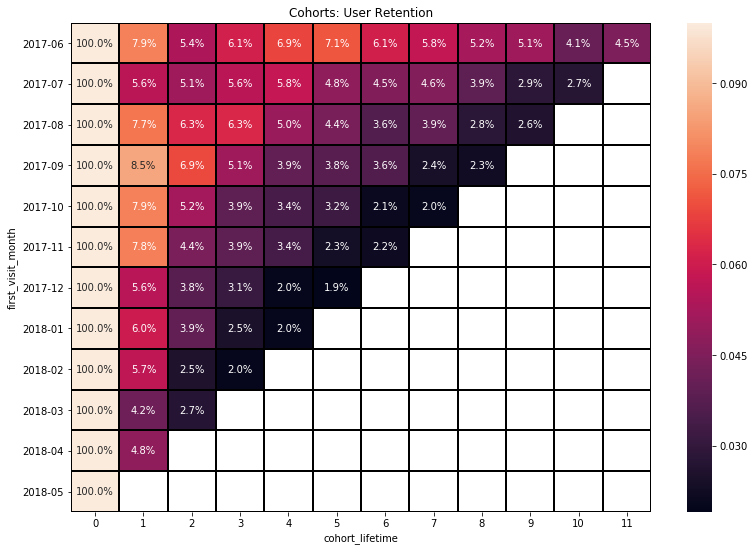

In [79]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)
cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count)#,on='first_activity_week'
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='retention', aggfunc='sum')
plt.figure(figsize=(13, 9))# Set the figure size
plt.title('Cohorts: User Retention') # Set the visualization title
g=sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='black', vmax=0.1) # Make a heatmap
g.set_yticklabels(retention_pivot.index.strftime('%Y-%m'))
plt.show()

**Conclusion:** The second cohort shows the highest retention. The sixth cohort shoes the lowest. 

<div class="alert alert-danger">
<b>Reviewer's comment:</b> Please, calculate mean retention rate per columns (cohort ages). You can plot it inside heatmap if you append mean result to the data table. Check this:<a>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html</a>
</div>

<div class="alert alert-warning">
<b>Reviewer's comment v2: </b> Like this: 
    
Probably, approach with <code>loc</code> would be more native for you    
</div>


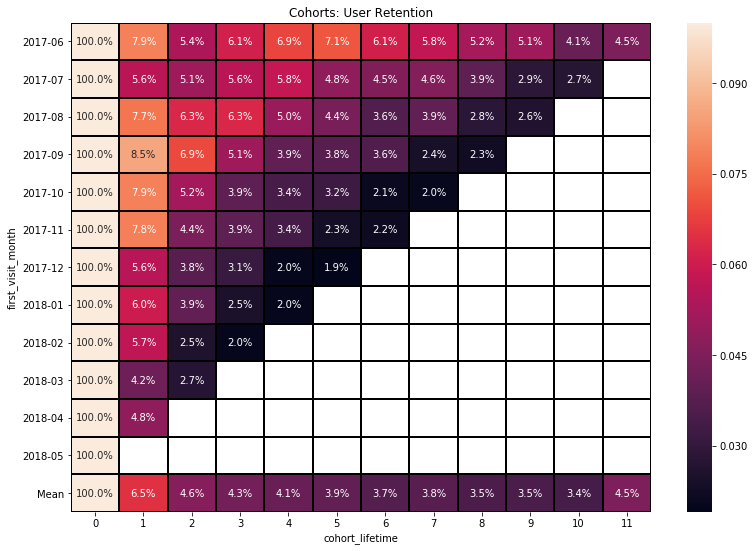

In [80]:
### Reviewer's code

# Format indexes
retention_pivot.index = retention_pivot.index.to_series().dt.strftime('%Y-%m')
# Add new row
retention_pivot.loc['Mean', :] = retention_pivot.mean(axis=0)

plt.figure(figsize=(13, 9))# Set the figure size
plt.title('Cohorts: User Retention') # Set the visualization title
g=sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='black', vmax=0.1) # Make a heatmap
plt.show()

<div class="alert alert-info"> <b>Student's comment:</b> 
    Very nice, thank you! 
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Plase, add general conclusions for the product part.
</div>

**General conclusion for the 'product' part:**  

The percentage of users who are still using the site after one week is 16. The percentage of users who are still using the site after one month is 4.

We can see a sharp peak in daily active usage on the 24th of November 2017 with 3319 active users and a substantial fall on the 30th of March 2018 with 131 active users. Other than that, daily usage appears higher during colder months than during warmer months.

The bar graph confirms the observations taken from daily active users line graph. Colder months evidently correlate with higher number of users of the site.

The difference between touch and desktop is not very dramatic, but still quite noticable. That could be explained by people searching for information about cultural events during their lunch breaks at work where they use desktop computers.

The graph shows that people mostly use the website once a day.
Most sessions last around 60 seconds. The histogram shows that sessions over an hour (3600) are very rare.
The second cohort shows the highest retention. The sixth cohort shoes the lowest.

**Sales**<a id='sales'></a>

**When do people start buying?**<a id='when'></a>

In [81]:
first_order_dates = orders.groupby(['uid'])['buy ts'].min().reset_index()
first_order_dates
first_order_dates.rename({'buy ts':'first_order_date'},axis=1,inplace=True) 
first_order_dates.head()

uid    first_order_date
0   313578113262317 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00
3  2464366381792757 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00

In [82]:
first_order_dates = first_order_dates.merge(first_visit_dates)
first_order_dates.head()

uid    first_order_date    first_visit_date
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00

In [83]:
first_order_dates['difference'] = first_order_dates['first_order_date'] - first_order_dates['first_visit_date']
first_order_dates.head()

uid    first_order_date    first_visit_date        difference
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00 106 days 23:02:00
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00   0 days 00:00:00
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00   0 days 01:19:00
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00   0 days 19:44:00
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00   0 days 00:00:00

In [84]:
first_order_dates['difference'] = first_order_dates['difference'] / np.timedelta64(1, 'D')
first_order_dates['difference'] = first_order_dates['difference'].round().astype(int)
first_order_dates.head()

uid    first_order_date    first_visit_date  difference
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00         107
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00           0
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00           0
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00           1
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00           0

In [85]:
first_order_dates_less_0 = first_order_dates.query('difference < 0')
first_order_dates_less_0

Empty DataFrame
Columns: [uid, first_order_date, first_visit_date, difference]
Index: []

In [86]:
Q1 = first_order_dates['difference'].quantile(.25)
Q3 = first_order_dates['difference'].quantile(.75)
IQR = Q3 - Q1
IQR*1.5 + Q3

5.0

In [87]:
def evaluating(row):
    days = row['difference']
    if days == 0:
        return 'Conversion 0d'
    if days <= 7 and days > 0:
        return 'Conversion 0-7d'
    if days <= 14 and days > 7:
        return 'Conversion 7-14d'
    if days <= 30 and days > 14:
        return 'Conversion 14-30d'
    if days > 30:
        return 'Conversion after a month'
    
first_order_dates['conversion'] = first_order_dates.apply(evaluating, axis=1)
first_order_dates.head()

uid    first_order_date    first_visit_date  difference  \
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00         107   
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00           0   
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00           0   
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00           1   
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00           0   

                 conversion  
0  Conversion after a month  
1             Conversion 0d  
2             Conversion 0d  
3           Conversion 0-7d  
4             Conversion 0d

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Nice idea. You can do it more effectively with pandas cut function: <a>https://pbpython.com/pandas-qcut-cut.html</a>
</div>

<div class="alert alert-info"> <b>Student's comment:</b> 
    Thank you for the link, I will study it.
</div>

In [88]:
conv_for_bar_groupby = first_order_dates.groupby(['conversion'])['uid'].nunique().reset_index()
conv_for_bar_groupby

conversion    uid
0           Conversion 0-7d   4116
1             Conversion 0d  25203
2         Conversion 14-30d   1279
3          Conversion 7-14d    980
4  Conversion after a month   4931

In [89]:
conv_for_bar_groupby['rate'] = conv_for_bar_groupby['uid'] / visits['uid'].nunique() * 100
conv_for_bar_groupby

conversion    uid       rate
0           Conversion 0-7d   4116   1.803926
1             Conversion 0d  25203  11.045760
2         Conversion 14-30d   1279   0.560549
3          Conversion 7-14d    980   0.429506
4  Conversion after a month   4931   2.161117

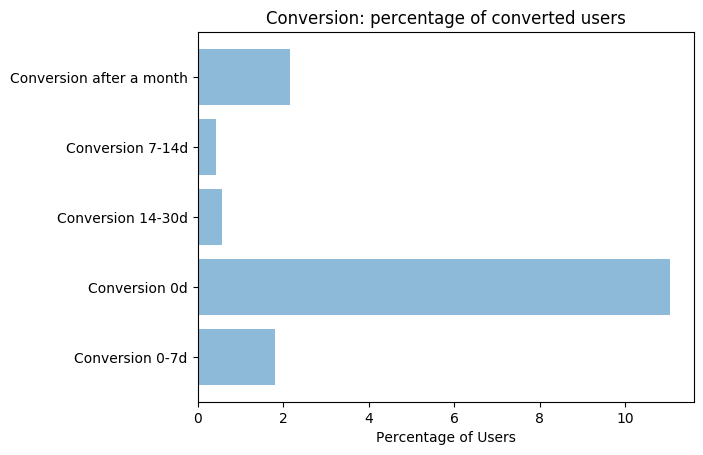

In [90]:
import matplotlib.pyplot as plt; plt.rcdefaults()
conversion = conv_for_bar_groupby['conversion']
y_pos = np.arange(len(conversion))
users = conv_for_bar_groupby['rate']

plt.barh(y_pos, users, align='center', alpha=0.5)
plt.yticks(y_pos, conversion)
plt.xlabel('Percentage of Users')
plt.title('Conversion: percentage of converted users')

plt.show()

In [91]:
first_order_dates.sample()

uid    first_order_date    first_visit_date  \
15366  7713040744488425245 2018-01-01 19:02:00 2018-01-01 18:53:00   

       difference     conversion  
15366           0  Conversion 0d

In [92]:
first_order_dates['Conversion_0d'] = first_order_dates['difference'].apply(lambda x: x==0)
first_order_dates['Conversion_7d'] = first_order_dates['difference'].apply(lambda x: x<=7)
first_order_dates['Conversion_14d'] = first_order_dates['difference'].apply(lambda x: x<=14)
first_order_dates['Conversion_30d'] = first_order_dates['difference'].apply(lambda x: x<=30)

<div class="alert alert-warning">
<b>Reviewer's comment: </b> pd.cut would be useful here as well.
</div>

<div class="alert alert-info"> <b>Student's comment:</b> 
    Seems like a very useful function.
</div>

In [93]:
first_order_dates[first_order_dates['Conversion_0d']==True].groupby(['Conversion_0d'])['uid'].nunique().reset_index()['uid'].loc[0]

25203

In [94]:
conversion_table = []
for i in ['Conversion_0d', 'Conversion_7d', 'Conversion_14d', 'Conversion_30d']:
    conversion_table.append((i, first_order_dates[first_order_dates[i]==True].groupby([i])['uid'].nunique().reset_index()['uid'].loc[0]/visits['uid'].nunique()*100))

In [95]:
conversion_table

[('Conversion_0d', 11.045759941096293),
 ('Conversion_7d', 12.849685978375676),
 ('Conversion_14d', 13.27919217772791),
 ('Conversion_30d', 13.839741595045776)]

In [96]:
conversion_table = DataFrame(conversion_table, columns=['Conversion', 'Rate'])
conversion_table

Conversion       Rate
0   Conversion_0d  11.045760
1   Conversion_7d  12.849686
2  Conversion_14d  13.279192
3  Conversion_30d  13.839742

In [97]:
conv = px.line(conversion_table, x='Conversion', y='Rate', title='Conversion')
conv.show()

**Conclusion:** The percentage of users converted on the first day of interacting with the website is 11%. The graph shows that by the 30th day of interacting with the website nearly 14% of users are converted.

<div class="alert alert-success">
<b>Reviewer's comment: </b> Yep, you are right.
</div>

**Conversion by source id:**

Checking if same uid belongs to several sources:

In [98]:
visits.columns = visits.columns.str.replace(' ','_')

In [99]:
visits.groupby('uid').agg({'source_id':'nunique'}).reset_index().query('source_id > 1')['uid'].count()

37720

In [100]:
actual_source_id = visits.groupby('uid').agg({'source_id':lambda x: x.value_counts(dropna=False).index[0]}).reset_index()
actual_source_id.head()

uid  source_id
0   11863502262781          3
1   49537067089222          2
2  297729379853735          3
3  313578113262317          2
4  325320750514679          5

In [101]:
actual_source_id.shape[0]

228169

In [102]:
actual_source_id.columns = ['uid', 'actual_source_id']
visits_new = visits.merge(actual_source_id, on='uid', how='left')
visits_new.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                    uid session_year session_month session_week session_date  \
0  16879256277535980062   2017-01-01    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740   2018-01-01    2018-02-01   2018-02-15   2018-02-19   
2   7459035603376831527   2017-01-01    2017-07-01   2017-06-29   2017-07-01   
3  16174680259334210214   2018-01-01    2018-05-01   2018-05-17   2018-05-20   
4  16174680259334210214   2018-01-01    2018-03-01   2018-03-08   2018-03-09   

  month_year  session_duration_sec                 day    first_visit_date  \
0    2017-12                  1080 2017-12-20 17:20:00 2017-12-20 17:20:00   
1    2018-02                  1680 2018-02-19 16:53:00 2018-02-19 16:53:00   
2    2017-07                     0 2017-07-01 01:54:00 2017-07-01 01:54:00   
3    2018-05                  1440 2018-05-20 10:59:00 2018-03-09 20:05:00   
4    2018-03                  1680 2018-03-09 20:05:00 2018-03-09 20:05:00   

  visit_month first_visit_month  cohort_lifetime  actual_source_id  
0  2017-12-01        2017-12-01                0                 4  
1  2018-02-01        2018-02-01                0                 2  
2  2017-07-01        2017-07-01                0                 5  
3  2018-05-01        2018-03-01                2                 9  
4  2018-03-01        2018-03-01                0                 9

In [103]:
visits_new.groupby('uid').agg({'actual_source_id':'nunique'}).reset_index().query('actual_source_id > 1')['uid'].count()

0

In [104]:
visits_from_source = visits_new.groupby('actual_source_id').agg({'uid':'nunique'}).reset_index()
visits_from_source = visits_from_source.rename(columns={'uid':'visits_from_source'})
visits_from_source.head()

actual_source_id  visits_from_source
0                 1               10713
1                 2               19857
2                 3               68638
3                 4               66925
4                 5               48517

In [105]:
conversion_source = first_order_dates.merge(actual_source_id, on=['uid'], how='left')
conversion_source.head()

uid    first_order_date    first_visit_date  difference  \
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00         107   
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00           0   
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00           0   
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00           1   
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00           0   

                 conversion  Conversion_0d  Conversion_7d  Conversion_14d  \
0  Conversion after a month          False          False           False   
1             Conversion 0d           True           True            True   
2             Conversion 0d           True           True            True   
3           Conversion 0-7d          False           True            True   
4             Conversion 0d           True           True            True   

   Conversion_30d  actual_source_id  
0           False                 2  
1            True                10  
2            True                 3  
3            True                 5  
4            True                 5

In [106]:
def conversion(column):
    abs_conversion = conversion_source[conversion_source[column]==True]\
    .groupby(['actual_source_id'])['uid'].nunique().reset_index().rename(columns={'uid':'{}'.format(column)})
    conversions = visits_from_source.merge(abs_conversion, on=['actual_source_id'], how='left')
    conversions['{}%'.format(column)]=(conversions['{}'.format(column)]*100/conversions['visits_from_source']).fillna(0)
    conversions = conversions[['actual_source_id', '{}%'.format(column)]]
    return conversions

In [107]:
conversion_new = []
for i in ['Conversion_0d', 'Conversion_7d', 'Conversion_14d', 'Conversion_30d']:
    conversion_new.append(conversion(i))
conversion_new

[   actual_source_id  Conversion_0d%
 0                 1       21.366564
 1                 2       13.556932
 2                 3       10.982255
 3                 4        9.008592
 4                 5       10.313911
 5                 6        0.000000
 6                 7        2.941176
 7                 9       10.881773
 8                10       13.537435,
    actual_source_id  Conversion_7d%
 0                 1       25.875105
 1                 2       16.739689
 2                 3       12.788834
 3                 4       10.317520
 4                 5       11.569141
 5                 6        0.000000
 6                 7        2.941176
 7                 9       12.945819
 8                10       15.568775,
    actual_source_id  Conversion_14d%
 0                 1        26.957902
 1                 2        17.590774
 2                 3        13.163262
 3                 4        10.646246
 4                 5        11.855638
 5                 6         0

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Sorry, what's the point to repeat your imports from time to time, and sometimes even don't use these import methods after that?
</div>

<div class="alert alert-info"> <b>Student's comment:</b>
    No more repetition :) 
</div>

<div class="alert alert-success">
<b>Reviewer's comment v2</b> :)
</div>

In [108]:
conversion_new = pd.concat(conversion_new, axis=1)
conversion_new = conversion_new.loc[:, ~conversion_new.columns.duplicated()]
conversion_new = conversion_new.set_index('actual_source_id')
conversion_new

Conversion_0d%  Conversion_7d%  Conversion_14d%  \
actual_source_id                                                    
1                      21.366564       25.875105        26.957902   
2                      13.556932       16.739689        17.590774   
3                      10.982255       12.788834        13.163262   
4                       9.008592       10.317520        10.646246   
5                      10.313911       11.569141        11.855638   
6                       0.000000        0.000000         0.000000   
7                       2.941176        2.941176         2.941176   
9                      10.881773       12.945819        13.598422   
10                     13.537435       15.568775        16.091120   

                  Conversion_30d%  
actual_source_id                   
1                       27.994026  
2                       18.653372  
3                       13.680469  
4                       11.082555  
5                       12.280232  
6                        0.000000  
7                        2.941176  
9                       14.736682  
10                      16.511898

Removing source_id number 6 and 7 from the heatmap:

In [109]:
visits.shape[0]

359400

In [110]:
check6 = visits_new.query('"6" in actual_source_id')
check6.shape[0]

11

In [111]:
conversion_new_wo_6 = conversion_new.query('"6" not in actual_source_id')

In [112]:
check7 = visits_new.query('"7" in actual_source_id')
check7.shape[0]

46

In [113]:
conversion_new_wo_6and7 = conversion_new_wo_6.query('"7" not in actual_source_id')

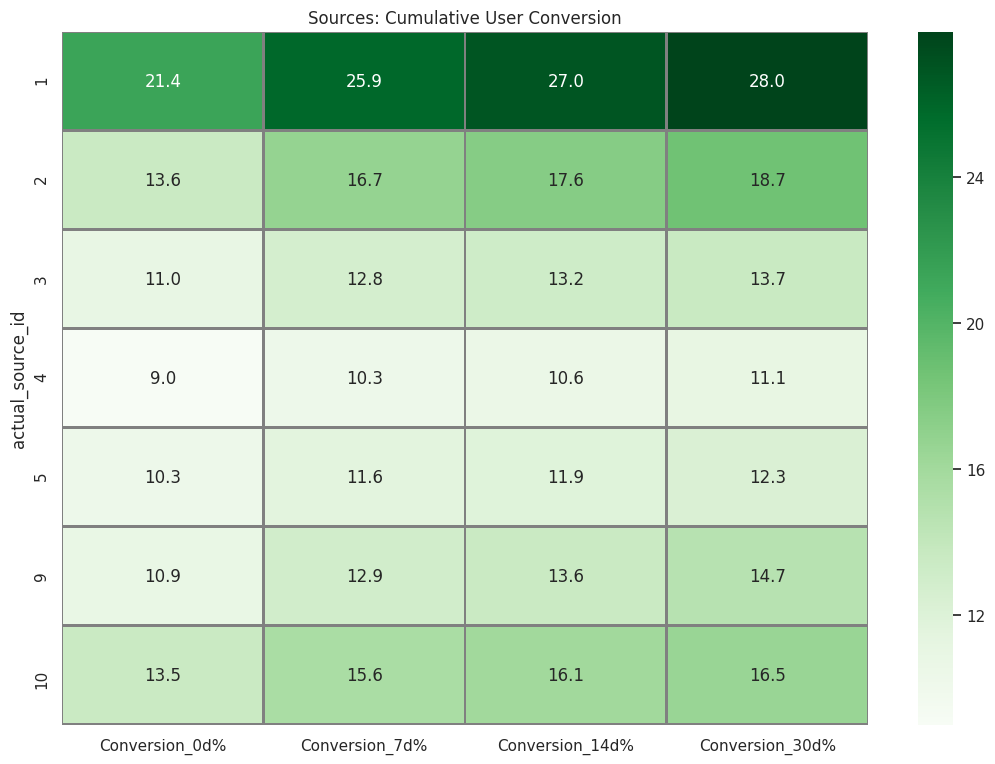

In [114]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Sources: Cumulative User Conversion')
sns.heatmap(conversion_new_wo_6and7, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap="Greens")
plt.show(); 

**Conclusion:** We can see higher rates of conversion for sources 1, 2, 10 and 9.

**Conversion by cohort lifetime:**

In [115]:
visits_from_cohort = visits_new.groupby('cohort_lifetime').agg({'uid':'nunique'}).reset_index()
visits_from_cohort = visits_from_cohort.rename(columns={'uid':'visits_from_cohort'})
visits_from_cohort.head()

cohort_lifetime  visits_from_cohort
0                0              228169
1                1               13815
2                2                8714
3                3                6901
4                4                5621

In [116]:
conversion_cohort = first_order_dates.merge(visits_new, on=['uid'], how='left')
conversion_cohort.head()

uid    first_order_date  first_visit_date_x  difference  \
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00         107   
1   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00         107   
2   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00         107   
3  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00           0   
4  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00           0   

                 conversion  Conversion_0d  Conversion_7d  Conversion_14d  \
0  Conversion after a month          False          False           False   
1  Conversion after a month          False          False           False   
2  Conversion after a month          False          False           False   
3             Conversion 0d           True           True            True   
4             Conversion 0d           True           True            True   

   Conversion_30d   device  ... session_week  session_date month_year  \
0           False  desktop  ...   2018-03-08    2018-03-11    2018-03   
1           False  desktop  ...   2017-09-14    2017-09-18    2017-09   
2           False  desktop  ...   2018-02-15    2018-02-18    2018-02   
3            True    touch  ...   2017-06-01    2017-06-03    2017-06   
4            True    touch  ...   2017-06-01    2017-06-03    2017-06   

  session_duration_sec                 day  first_visit_date_y visit_month  \
0                  360 2018-03-11 17:23:00 2017-09-18 22:49:00  2018-03-01   
1                 1080 2017-09-18 22:49:00 2017-09-18 22:49:00  2017-09-01   
2                  540 2018-02-18 15:17:00 2017-09-18 22:49:00  2018-02-01   
3                  240 2017-06-03 10:13:00 2017-06-03 10:13:00  2017-06-01   
4                  720 2017-06-03 17:36:00 2017-06-03 10:13:00  2017-06-01   

  first_visit_month  cohort_lifetime actual_source_id  
0        2017-09-01                6                2  
1        2017-09-01                0                2  
2        2017-09-01                5                2  
3        2017-06-01                0               10  
4        2017-06-01                0               10  

[5 rows x 25 columns]

In [117]:
def conversion(column):
    abs_conversion = conversion_cohort[conversion_cohort[column]==True]\
    .groupby(['cohort_lifetime'])['uid'].nunique().reset_index().rename(columns={'uid':'{}'.format(column)})
    conversions = visits_from_cohort.merge(abs_conversion, on=['cohort_lifetime'], how='left')
    conversions['{}%'.format(column)]=(conversions['{}'.format(column)]*100/conversions['visits_from_cohort']).fillna(0)
    conversions = conversions[['cohort_lifetime', '{}%'.format(column)]]
    return conversions

In [118]:
conversion_new = []
for i in ['Conversion_0d', 'Conversion_7d', 'Conversion_14d', 'Conversion_30d']:
    conversion_new.append(conversion(i))
conversion_new

[    cohort_lifetime  Conversion_0d%
 0                 0       11.045760
 1                 1       13.253710
 2                 2       13.231581
 3                 3       12.317055
 4                 4       12.186444
 5                 5       12.846620
 6                 6       13.539597
 7                 7       11.806070
 8                 8       12.359551
 9                 9       12.927757
 10               10       10.555556
 11               11       13.758389,
     cohort_lifetime  Conversion_7d%
 0                 0       12.849686
 1                 1       18.711545
 2                 2       17.489098
 3                 3       16.345457
 4                 4       16.189290
 5                 5       16.399480
 6                 6       17.002555
 7                 7       15.877128
 8                 8       15.516319
 9                 9       16.197719
 10               10       13.777778
 11               11       18.288591,
     cohort_lifetime  Conversion_14d

In [119]:
conversion_new = pd.concat(conversion_new, axis=1)
conversion_new = conversion_new.loc[:, ~conversion_new.columns.duplicated()]
conversion_new = conversion_new.set_index('cohort_lifetime')
conversion_new

Conversion_0d%  Conversion_7d%  Conversion_14d%  \
cohort_lifetime                                                    
0                     11.045760       12.849686        13.279192   
1                     13.253710       18.711545        21.114730   
2                     13.231581       17.489098        18.854717   
3                     12.317055       16.345457        17.562672   
4                     12.186444       16.189290        17.452411   
5                     12.846620       16.399480        17.417678   
6                     13.539597       17.002555        18.450185   
7                     11.806070       15.877128        16.987417   
8                     12.359551       15.516319        16.211878   
9                     12.927757       16.197719        17.262357   
10                    10.555556       13.777778        15.222222   
11                    13.758389       18.288591        19.463087   

                 Conversion_30d%  
cohort_lifetime                   
0                      13.839742  
1                      26.254072  
2                      21.207253  
3                      19.953630  
4                      19.605052  
5                      19.519064  
6                      20.408743  
7                      19.059956  
8                      18.245051  
9                      19.619772  
10                     16.888889  
11                     21.308725

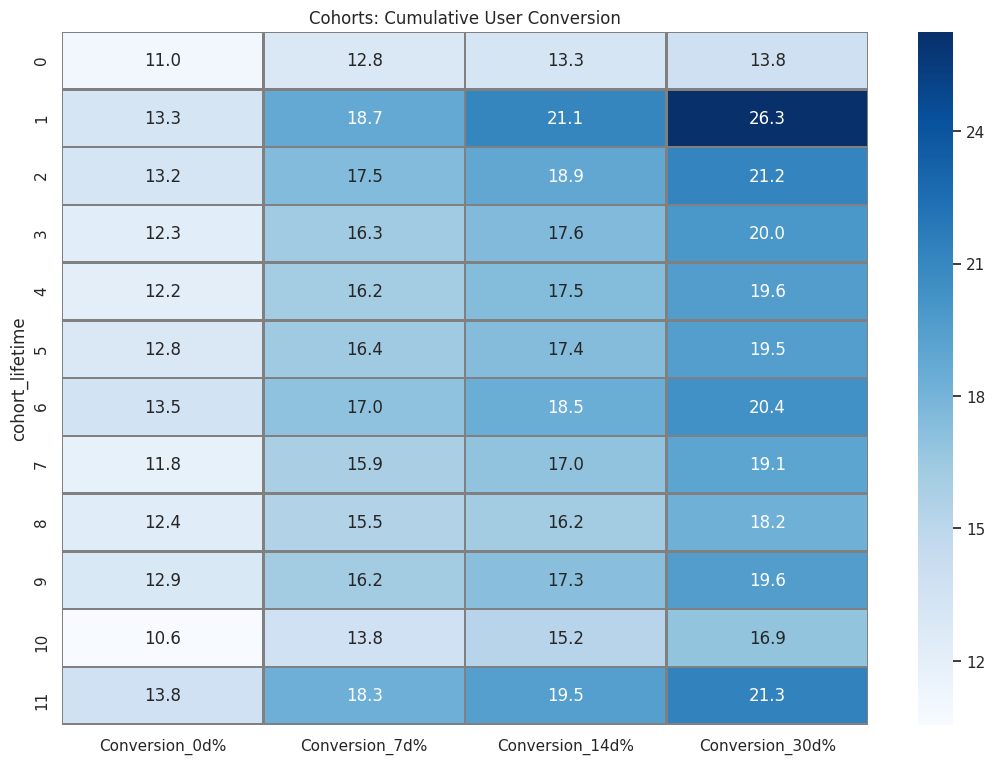

In [120]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Cumulative User Conversion')
sns.heatmap(conversion_new, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap="Blues")
plt.show(); 

**Conclusion:** We can see higher rates of conversion for cohorts 1, 2, 6 and 11.

<div class="alert alert-success">
<b>Reviewer's comment: </b> This part was optional, great that you have added it.
</div>

**How many orders do they make during a given period of time?**<a id='orders'></a>

In [121]:
orders['buy_date'] = orders['buy ts'].dt.date

In [122]:
orders.sample()

buy ts   revenue                   uid    buy_date
44464 2018-04-18 07:03:00  8.546875  14331253355026440110  2018-04-18

**Conclusion:**

**Number of orders per day and per month:**

In [123]:
orders_per_day = orders.pivot_table(index='buy_date', values='uid', aggfunc='count').reset_index()
orders_per_day.rename({'uid':'orders_per_day_'}, axis=1, inplace=True)
orders_per_day.sort_values(by='orders_per_day_', ascending=False).head()
orders_per_day.head()

buy_date  orders_per_day_
0  2017-06-01               96
1  2017-06-02              111
2  2017-06-03               67
3  2017-06-04               66
4  2017-06-05              161

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Please, pay attention to data frame formatting in your project. Don't forget to use head(), tail(), or sample() when outputting large tables. If you leave everything "as is", when you save the project to github, all the tables will expand to their full length and take up most of the project. Plus, the jupyter notebook wastes extra resources when loading such tables. 
</div>

<div class="alert alert-info"> <b>Student's comment:</b> 
    Sure.
</div>

In [124]:
Q1 = orders_per_day['orders_per_day_'].quantile(.25)
Q3 = orders_per_day['orders_per_day_'].quantile(.75)
IQR = Q3 - Q1
IQR*1.5 + Q3

318.375

In [125]:
orders_per_day['month'] = orders_per_day['buy_date'].astype('datetime64[M]')
orders_per_day
orders_per_month = orders_per_day.groupby(['month'])['orders_per_day_'].sum().reset_index()
orders_per_month.head()

month  orders_per_day_
0 2017-06-01             2353
1 2017-07-01             2362
2 2017-08-01             1803
3 2017-09-01             3383
4 2017-10-01             5677

In [126]:
orders_per_day.orders_per_day_.sum()

50364

In [127]:
orders_per_month.orders_per_day_.sum()

50364

In [128]:
date = []
date = orders_per_day['buy_date']
n_orders_per_day = []
n_orders_per_day = orders_per_day['orders_per_day_']

figgg = go.Figure(data=go.Scatter(x=date, y=n_orders_per_day))
figgg.update_layout(title='The total number of orders per day:',
                 xaxis_title = 'Date of Order',
                 yaxis_title = 'Number of orders')
figgg.show()

**Conclusion:** We can see a peak in the end of November with 814 total orders that corresponds with observations from previous graphs as well as a substantial peak on the 31st of May with 610 total orders.

In [129]:
month = []
month = orders_per_month['month']
n_orders_per_month = []
n_orders_per_month = orders_per_month['orders_per_day_']

figg = go.Figure(data=go.Scatter(x=month, y=n_orders_per_month))
figg.update_layout(title='The total number of orders per month:',
                 xaxis_title = 'Month of Order',
                 yaxis_title = 'Number of orders')
figg.show()

**Conclusion:** Although we saw that the day with the highest number of orders was in November, overall December saw the highest number of orders in total. 

<div class="alert alert-success">
<b>Reviewer's comment: </b> Good job!
</div>

**Orders by source:**

In [130]:
orders.sample()

buy ts   revenue                  uid    buy_date
42956 2018-04-03 17:40:00  6.109375  5226341591278590219  2018-04-03

In [131]:
orders_by_source = orders.merge(actual_source_id, on='uid', how='left')
orders_by_source['month'] = orders_by_source['buy_date'].astype('datetime64[M]')
orders_by_source_ = orders_by_source.query('"7" not in actual_source_id')
orders_by_source_.head()

buy ts    revenue                   uid    buy_date  \
0 2017-06-01 00:10:00  17.000000  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00   0.549805  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00   0.370117  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00   0.549805  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00   0.370117  14200605875248379450  2017-06-01   

   actual_source_id      month  
0                 1 2017-06-01  
1                 2 2017-06-01  
2                 2 2017-06-01  
3                 2 2017-06-01  
4                 3 2017-06-01

In [132]:
orders.uid.nunique()

36509

In [133]:
orders_by_source.duplicated().sum()

0

In [134]:
orders.shape[0]

50364

In [135]:
orders_by_source_.shape[0]

50363

In [136]:
orders_by_source.sample()

buy ts  revenue                   uid    buy_date  \
23572 2017-12-12 16:02:00  0.72998  13888745432979765063  2017-12-12   

       actual_source_id      month  
23572                 5 2017-12-01

In [137]:
orders_by_source_.sample()

buy ts   revenue                   uid    buy_date  \
31461 2018-01-28 19:42:00  7.328125  15089170693093313144  2018-01-28   

       actual_source_id      month  
31461                 2 2018-01-01

In [138]:
orders_by_source_.month.value_counts()

2017-12-01    6206
2017-10-01    5677
2017-11-01    5644
2018-03-01    5325
2018-02-01    5280
2018-01-01    4721
2018-05-01    4344
2017-09-01    3383
2018-04-01    3265
2017-07-01    2362
2017-06-01    2353
2017-08-01    1802
2018-06-01       1
Name: month, dtype: int64

In [139]:
orders_by_source_pivot = orders_by_source_.pivot_table(index='month', columns='actual_source_id', values='uid', aggfunc='nunique')
orders_by_source_pivot

actual_source_id     1      2       3       4      5      9      10
month                                                              
2017-06-01        184.0  288.0   677.0   355.0  349.0   85.0   84.0
2017-07-01        197.0  285.0   544.0   420.0  421.0   68.0   48.0
2017-08-01        131.0  186.0   381.0   297.0  347.0   89.0   39.0
2017-09-01        260.0  356.0   808.0   533.0  603.0  111.0   77.0
2017-10-01        398.0  639.0  1306.0  1028.0  906.0  201.0  195.0
2017-11-01        452.0  692.0  1287.0  1061.0  724.0  211.0  116.0
2017-12-01        489.0  645.0  1434.0  1340.0  763.0  180.0   86.0
2018-01-01        344.0  478.0  1135.0  1006.0  692.0  149.0   94.0
2018-02-01        377.0  514.0  1286.0  1036.0  772.0  135.0  138.0
2018-03-01        381.0  556.0  1163.0  1013.0  642.0  232.0  194.0
2018-04-01        266.0  391.0   737.0   672.0  484.0   65.0  127.0
2018-05-01        354.0  599.0   999.0   763.0  609.0   77.0  141.0
2018-06-01          NaN    NaN     NaN     1.0    NaN    NaN    NaN

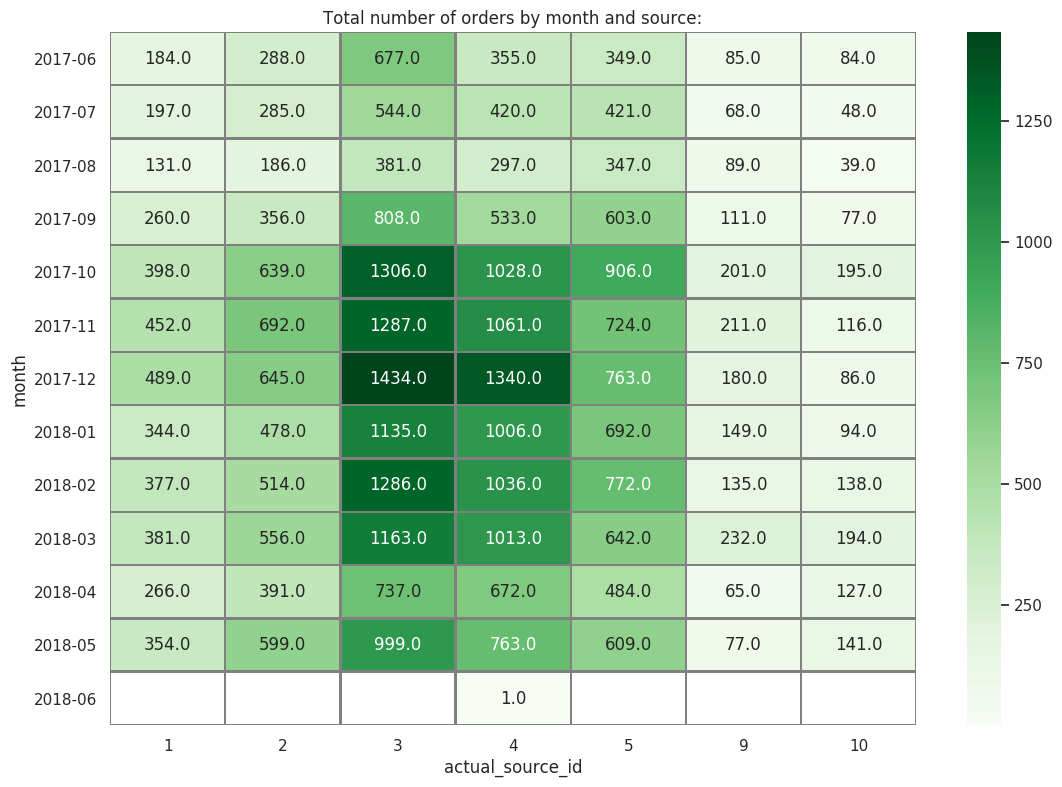

In [140]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Total number of orders by month and source:')
g = sns.heatmap(orders_by_source_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap="Greens")
g.set_yticklabels(orders_by_source_pivot.index.strftime('%Y-%m'))
plt.show();

**Conclusion:** Sources 3 and 4 show the highest number of monthly orders.

**Orders by cohort:**

The range of expense dates coincides with that of order dates.<br>
It's helpful to find the LTV for different cohorts. Let's review what we need to do:<br>
- Find the date of each customer's first purchase
- Calculate the number of new customers for each date (or range of dates — here, for each month)
- Add the month of the first order to the table of orders
- Group the table and calculate the revenue<br>

We have data for almost a year. It'll be best to make monthly cohorts. Let's capture the months from the dates in the tables of orders and costs and retrieve the month of each customer's first purchase:

In [141]:
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]') 
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head() 

uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01

We'll add customers' first-purchase months to the table of orders:

In [142]:
orders_ = pd.merge(orders,first_orders, on='uid')
orders_.head()

buy ts    revenue                   uid    buy_date  \
0 2017-06-01 00:10:00  17.000000  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00   0.549805  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00   0.370117  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00   0.549805  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00   0.370117  14200605875248379450  2017-06-01   

  order_month first_order_month  
0  2017-06-01        2017-06-01  
1  2017-06-01        2017-06-01  
2  2017-06-01        2017-06-01  
3  2017-06-01        2017-06-01  
4  2017-06-01        2017-06-01

In [143]:
orders_['age'] = (orders_['order_month'] - orders_['first_order_month']) / np.timedelta64(1, 'M')
orders_['age'] = orders_['age'].round().astype('int')
orders_.head()

buy ts    revenue                   uid    buy_date  \
0 2017-06-01 00:10:00  17.000000  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00   0.549805  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00   0.370117  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00   0.549805  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00   0.370117  14200605875248379450  2017-06-01   

  order_month first_order_month  age  
0  2017-06-01        2017-06-01    0  
1  2017-06-01        2017-06-01    0  
2  2017-06-01        2017-06-01    0  
3  2017-06-01        2017-06-01    0  
4  2017-06-01        2017-06-01    0

In [144]:
orders_by_age_pivot = orders_.pivot_table(index='first_order_month', columns='age', values='uid', aggfunc='nunique')
orders_by_age_pivot

age                    0      1      2      3     4     5     6     7     8   \
first_order_month                                                              
2017-06-01         2022.0   61.0   50.0   54.0  87.0  67.0  61.0  47.0  58.0   
2017-07-01         1922.0   52.0   57.0   64.0  49.0  38.0  36.0  39.0  42.0   
2017-08-01         1369.0   58.0   53.0   44.0  40.0  32.0  30.0  44.0  19.0   
2017-09-01         2579.0  129.0   99.0   74.0  52.0  64.0  66.0  37.0  43.0   
2017-10-01         4340.0  206.0  123.0   92.0  93.0  72.0  56.0  67.0   NaN   
2017-11-01         4078.0  221.0  120.0  106.0  80.0  48.0  62.0   NaN   NaN   
2017-12-01         4380.0  146.0  103.0   97.0  50.0  63.0   NaN   NaN   NaN   
2018-01-01         3373.0  114.0   83.0   43.0  45.0   NaN   NaN   NaN   NaN   
2018-02-01         3651.0  118.0   58.0   39.0   NaN   NaN   NaN   NaN   NaN   
2018-03-01         3534.0   90.0   58.0    NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         2274.0   69.0    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01         2986.0    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
2018-06-01            1.0    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   

age                  9     10    11  
first_order_month                    
2017-06-01         45.0  45.0  53.0  
2017-07-01         22.0  26.0   NaN  
2017-08-01         31.0   NaN   NaN  
2017-09-01          NaN   NaN   NaN  
2017-10-01          NaN   NaN   NaN  
2017-11-01          NaN   NaN   NaN  
2017-12-01          NaN   NaN   NaN  
2018-01-01          NaN   NaN   NaN  
2018-02-01          NaN   NaN   NaN  
2018-03-01          NaN   NaN   NaN  
2018-04-01          NaN   NaN   NaN  
2018-05-01          NaN   NaN   NaN  
2018-06-01          NaN   NaN   NaN

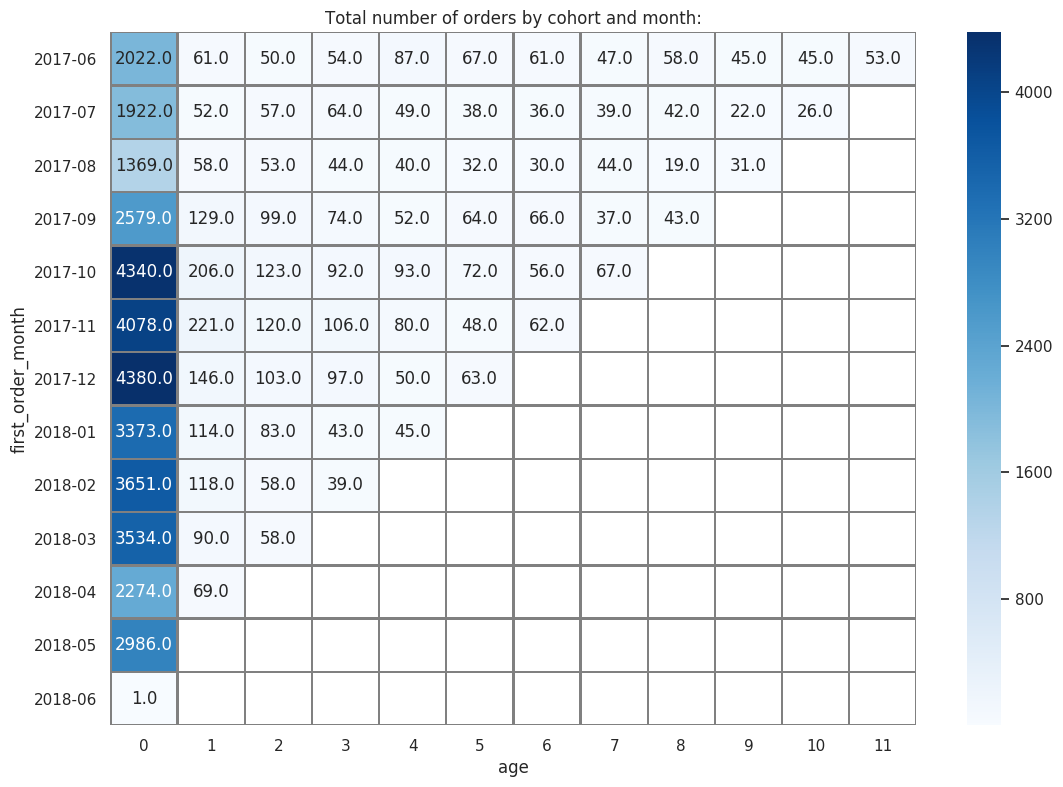

In [145]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Total number of orders by cohort and month:')
g = sns.heatmap(orders_by_age_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap="Blues")
g.set_yticklabels(orders_by_age_pivot.index.strftime('%Y-%m'))
plt.show();

**Conclusion:** The first cohort shows the highest number of orders during a period of October-December 2017.

**What is the average purchase size?**<a id='size'></a>

In [146]:
orders.sample()

buy ts   revenue                  uid    buy_date  \
50396 2018-05-31 23:01:00  1.160156  4326846074047313748  2018-05-31   

      order_month  
50396  2018-05-01

In [147]:
avg_orders_per_month = orders_per_day.groupby(['month'])['orders_per_day_'].mean().round().reset_index()
avg_orders_per_month =avg_orders_per_month.rename(columns={'orders_per_day_':'orders_per_month'})
avg_orders_per_month.head()

month  orders_per_month
0 2017-06-01              78.0
1 2017-07-01              76.0
2 2017-08-01              58.0
3 2017-09-01             113.0
4 2017-10-01             183.0

In [148]:
month = []
month = avg_orders_per_month['month']
avg_n_orders_per_month = []
avg_n_orders_per_month = avg_orders_per_month['orders_per_month']

plt.figure(figsize=(20,10))
fi = go.Figure(data=go.Scatter(x=month, y=avg_n_orders_per_month))
fi.update_layout(title='The average number of orders per month:',
                 xaxis_title = 'Month of Order',
                 yaxis_title = 'Average number of orders')
fi.show()

<Figure size 2000x1000 with 0 Axes>

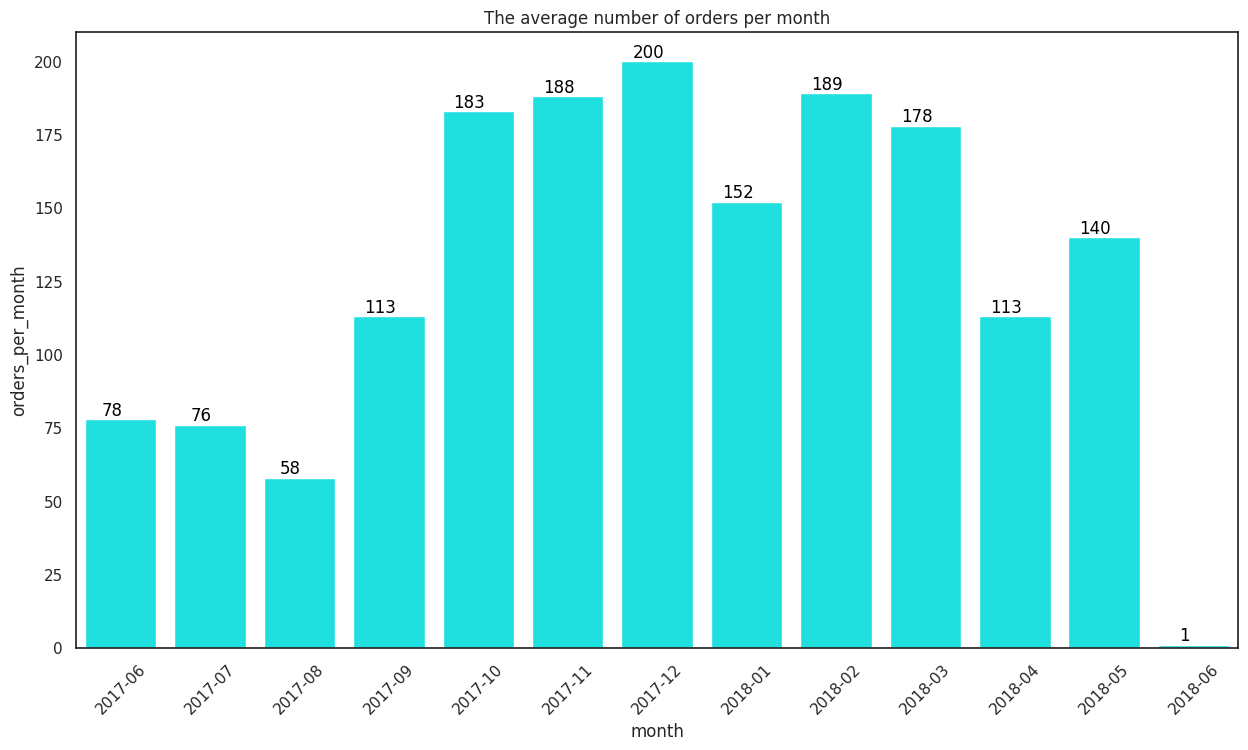

In [149]:
plt.figure(figsize=(15,8))
plt.title('The average number of orders per month')
graph = sns.barplot(data=avg_orders_per_month, x='month', y='orders_per_month', color='cyan')
plt.xticks(rotation=45)
graph.set_xticklabels(orders_by_age_pivot.index.strftime('%Y-%m'))
for p in graph.patches:
    graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black')
plt.show()

<div class="alert alert-success">
<b>Reviewer's comment: </b> Great, that you are already familiar with bars annotation trick :)
</div>

**Conclusion:** The average number of orders was the highest in winter months.

**How much money do they bring? (LTV)**<a id='ltv'></a>

The range of expense dates coincides with that of order dates.<br>
It's helpful to find the LTV for different cohorts. Let's review what we need to do:<br>
- Find the date of each customer's first purchase
- Calculate the number of new customers for each date (or range of dates — here, for each month)
- Add the month of the first order to the table of orders
- Group the table and calculate the revenue<br>

We have data for almost a year. It'll be best to make monthly cohorts. Let's capture the months from the dates in the tables of orders and costs and retrieve the month of each customer's first purchase:

In [150]:
#orders['order_month'] = orders['buy ts'].astype('datetime64[M]')
#costs['month'] = costs['dt'].astype('datetime64[M]') 
#first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
#first_orders.columns = ['uid', 'first_order_month']
#first_orders.head() 

We'll calculate the number of new customers (n_buyers) for each month:

In [151]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 

first_order_month  n_buyers
0        2017-06-01      2022
1        2017-07-01      1922
2        2017-08-01      1369
3        2017-09-01      2579
4        2017-10-01      4340

We'll add customers' first-purchase months to the table of orders:

In [152]:
#orders_ = pd.merge(orders,first_orders, on='uid')
#orders_.head() 

Now we'll group the table of orders by month of first purchase and month of purchase and sum up the revenue.

In [153]:
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head() 

first_order_month order_month  revenue
0        2017-06-01  2017-06-01   9560.0
1        2017-06-01  2017-07-01    981.5
2        2017-06-01  2017-08-01    885.5
3        2017-06-01  2017-09-01   1931.0
4        2017-06-01  2017-10-01   2068.0

The row of the cohort table specifies the revenue the cohort brought. For example, from the 0 row we can see that the customers who placed their first order in June 20187 brought in a total revenue of $9560.0 that month.


For purposes of cohort analysis, LTV is a cohort's cumulative revenue, accounting for the number of people in the cohort. Let's add data on how many users made their first purchases in each month to the cohorts table:

In [154]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head() 

first_order_month  n_buyers order_month  revenue
0        2017-06-01      2022  2017-06-01   9560.0
1        2017-06-01      2022  2017-07-01    981.5
2        2017-06-01      2022  2017-08-01    885.5
3        2017-06-01      2022  2017-09-01   1931.0
4        2017-06-01      2022  2017-10-01   2068.0

Earlier a column with new customers appeared in the table: n_buyers. The first five values in this column are the same, since they all concern the same cohort.

Just two more steps and we'll have LTV.

First, since LTV is calculated on the basis of gross profit rather than revenue, we need to find the gross profit by multiplying revenue by profitability. 

Second, LTV is a relative parameter, and it's easier to study for "mature" cohorts, so let's make the columns show the cohort's age instead of the month of the order:

In [155]:
margin_rate = .5

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head() 

first_order_month  n_buyers order_month  revenue       gp  age
0        2017-06-01      2022  2017-06-01   9560.0  4780.00    0
1        2017-06-01      2022  2017-07-01    981.5   490.75    1
2        2017-06-01      2022  2017-08-01    885.5   442.75    2
3        2017-06-01      2022  2017-09-01   1931.0   965.50    3
4        2017-06-01      2022  2017-10-01   2068.0  1034.00    4

Now we can finally calculate LTV. Let's divide the cohort's gross profit for each month by the total number of users in each cohort. We'll visualize the cohorts as a pivot table to make things clear:

In [156]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round(2)

output.cumsum(axis=1).fillna('') 

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         2.36   2.6  2.82   3.3  3.81  4.18  4.66  4.95  5.23  5.53   
2017-07-01         3.01  3.18  3.49  3.67  3.76  3.84   3.9  3.97  4.05  4.12   
2017-08-01         2.64  2.88  3.11  3.31  3.56   3.7  3.81  4.01  4.16  4.25   
2017-09-01         2.82  3.38  3.64  5.63  5.83  6.15   6.5  6.62  6.71         
2017-10-01         2.50  2.77  2.87  2.95  3.03  3.09  3.13  3.19               
2017-11-01         2.58  2.78  2.88  3.04  3.11  3.14   3.2                     
2017-12-01         2.37   2.5  2.96  3.49  3.65  3.82                           
2018-01-01         2.07  2.22  2.37  2.44  2.47                                 
2018-02-01         2.08  2.22  2.26   2.3                                       
2018-03-01         2.42  2.57  2.73                                             
2018-04-01         2.33   2.6                                                   
2018-05-01         2.33                                                         
2018-06-01         1.71                                                         

age                  10    11  
first_order_month              
2017-06-01         5.82  5.95  
2017-07-01          4.2        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01                     
2018-06-01

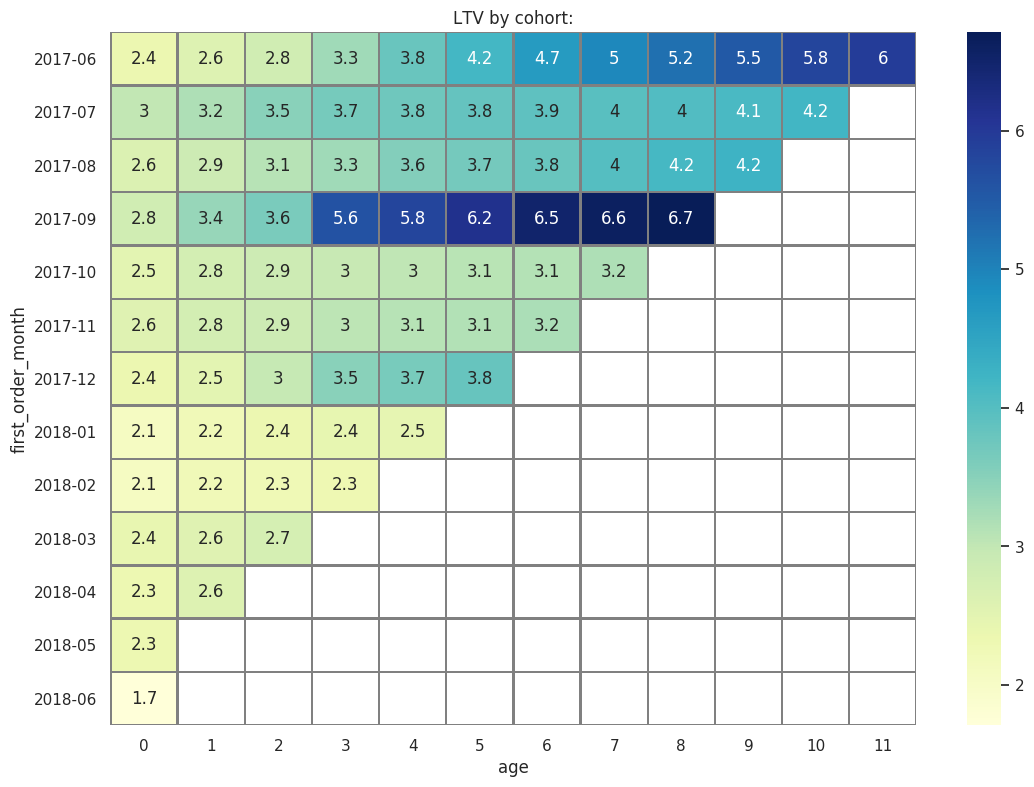

In [157]:
output_ltv = output.cumsum(axis=1)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV by cohort:')
g=sns.heatmap(output_ltv, annot=True, linewidths=1, linecolor='gray', cmap="YlGnBu")
g.set_yticklabels(output_ltv.index.strftime('%Y-%m'))
plt.show(); 

<div class="alert alert-success">
<b>Reviewer's comment: </b> That's it, LTV is correct.
</div>

<div class="alert alert-danger">
<b>Reviewer's comment:</b> Please, calculate mean LTV for the different ages (by columns). You can add this row to your table (and heatmap) with panads append method:<a>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html</a>
</div>

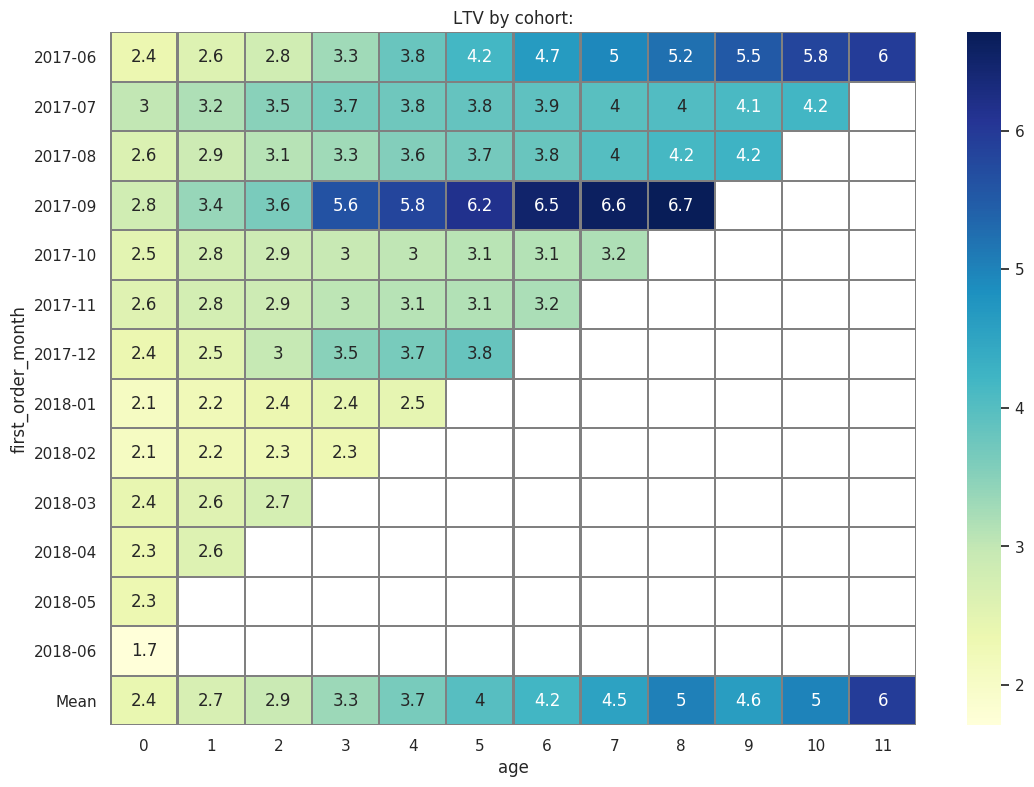

In [158]:
output_ltv = output.cumsum(axis=1)

output_ltv.index = output_ltv.index.to_series().dt.strftime('%Y-%m')

output_ltv.loc['Mean', :] = output_ltv.mean(axis=0)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV by cohort:')
sns.heatmap(output_ltv, annot=True, linewidths=1, linecolor='gray', cmap="YlGnBu")
plt.show(); 

**Conclusion:** Cohorts 3, 4, 5, 6, 7 and 8 had the highest LTV in September 2017.

<div class="alert alert-info"> <b>Student's comment:</b> 
    Done.
</div>

Let's find the LTV of the first cohort by adding up the value for each month:

In [159]:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706 

5.949999999999999

On average, each customer from the first cohort brought $3 in revenue over their 12-month liftetime.

Let's calculate CAC for this cohort. We'll divide the the costs for the cohort month by the number of people:

In [160]:
cohort_201706 = report[report['first_order_month'] == '2017-06-01']
costs_201706 = costs[costs['month'] == '2017-06-01']['costs'].sum()
n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = output.loc['2017-06-01'].sum()
print('CAC =', cac_201706)
print('LTV =', ltv_201706) 

CAC = 8.909990108803164
LTV = 5.949999999999999


Acquiring each customer cost the company an average of 8.9 dollars, while each customer brought in 5.94 dollars. So investment in customer acquisition did not paid off and even led to loss.

Let's run calculations for the other cohorts and determine the number of months each cohort requires to cover marketing expenses. We'll calculate CAC for each cohort. First we'll find the total expenses for each month, then we'll divide them by the number of customers in each cohort:

In [161]:
monthly_costs = costs.groupby('month').sum()
monthly_costs.head() 

source_id    costs
month                         
2017-06-01       1020  18016.0
2017-07-01       1054  18240.0
2017-08-01       1054  14792.0
2017-09-01       1020  24368.0
2017-10-01       1054  36320.0

Let's add the data on costs to the report and calculate CAC:

In [162]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head() 

first_order_month  n_buyers order_month  revenue       gp  age       ltv  \
0        2017-06-01      2022  2017-06-01   9560.0  4780.00    0  2.363996   
1        2017-06-01      2022  2017-07-01    981.5   490.75    1  0.242705   
2        2017-06-01      2022  2017-08-01    885.5   442.75    2  0.218966   
3        2017-06-01      2022  2017-09-01   1931.0   965.50    3  0.477498   
4        2017-06-01      2022  2017-10-01   2068.0  1034.00    4  0.511375   

   source_id    costs      cac  
0       1020  18016.0  8.90999  
1       1020  18016.0  8.90999  
2       1020  18016.0  8.90999  
3       1020  18016.0  8.90999  
4       1020  18016.0  8.90999

And now let's find ROMI (return on marketing investment) by dividing LTV by CAC.

To calculate cumulative ROMI, we'll need to call the method cumsum() (cumulative sum). This adds each new element in a set. For example, pd.Series([1, 2, 3]).cumsum() will return a series of three elements: 1, 3, and 6. Each value is the sum of the previous elements: 1, 3 = 1+2, 6 = 1+2+3.

In [163]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output.cumsum(axis=1).round(2) 

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.27  0.29  0.32  0.37  0.43  0.47  0.52  0.56  0.59  0.62   
2017-07-01         0.32  0.33  0.37  0.39  0.40  0.40  0.41  0.42  0.43  0.43   
2017-08-01         0.24  0.27  0.29  0.31  0.33  0.34  0.35  0.37  0.38  0.39   
2017-09-01         0.30  0.36  0.39  0.60  0.62  0.65  0.69  0.70  0.71   NaN   
2017-10-01         0.30  0.33  0.34  0.35  0.36  0.37  0.37  0.38   NaN   NaN   
2017-11-01         0.28  0.30  0.31  0.33  0.34  0.34  0.34   NaN   NaN   NaN   
2017-12-01         0.27  0.29  0.34  0.40  0.42  0.44   NaN   NaN   NaN   NaN   
2018-01-01         0.21  0.22  0.24  0.25  0.25   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.23  0.25  0.25  0.26   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.28  0.30  0.32   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.24  0.26   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01         0.31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

age                  10    11  
first_order_month              
2017-06-01         0.65  0.67  
2017-07-01         0.44   NaN  
2017-08-01          NaN   NaN  
2017-09-01          NaN   NaN  
2017-10-01          NaN   NaN  
2017-11-01          NaN   NaN  
2017-12-01          NaN   NaN  
2018-01-01          NaN   NaN  
2018-02-01          NaN   NaN  
2018-03-01          NaN   NaN  
2018-04-01          NaN   NaN  
2018-05-01          NaN   NaN

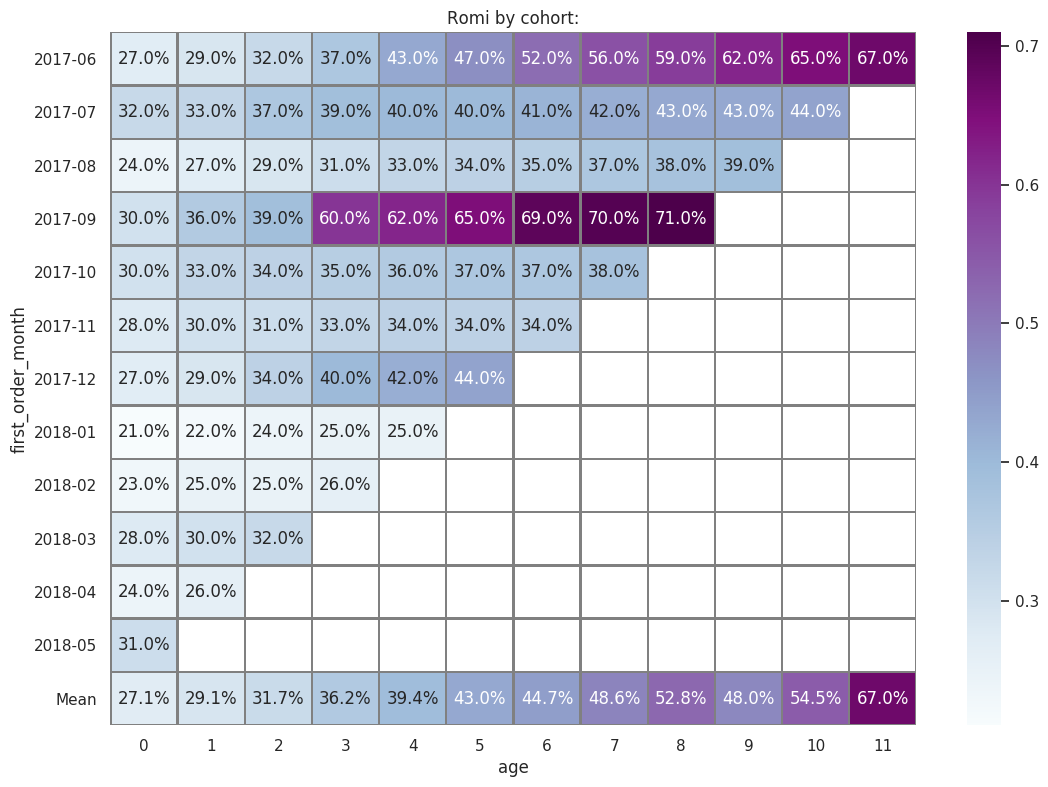

In [164]:
romi_by_cohort = output.cumsum(axis=1).round(2)

romi_by_cohort.index = romi_by_cohort.index.to_series().dt.strftime('%Y-%m')

romi_by_cohort.loc['Mean', :] = romi_by_cohort.mean(axis=0)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Romi by cohort:')
sns.heatmap(romi_by_cohort, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap="BuPu")
plt.show(); 

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Note, that ROMI is a percent metric. You can format in a more appropriate way.
</div>

<div class="alert alert-info"> <b>Student's comment:</b> 
    Done :)
</div>

**Conclusion:** Cohorts 3 to 8 got closer to paying of in September 2017, but never actually paid off. Same goes for cohorts 10 and 11 in June 2016. On average, cohorts never paid off and even got worse.

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please, add general conclusions for the sales part.
</div>

**General conclusion for 'sales' part:**

The percentage of users converted on the first day of interacting with the website is 11%. The graph shows that by the 30th day of interacting with the website nearly 14% of users are converted.

We can see higher rates of conversion for sources 1, 2, 10 and 9.

We can see higher rates of conversion for cohorts 1, 2, 6 and 11.

We can see a peak in the end of November with 814 total orders that corresponds with observations from previous graphs as well as a substantial peak on the 31st of May with 610 total orders.

Although we saw that the day with the highest number of orders was in November, overall December saw the highest number of orders in total.

Sources 3 and 4 show the highest number of monthly orders.

The first cohort shows the highest number of orders during a period of October-December 2017.

The average number of orders was the highest in winter months.

Cohorts 3, 4, 5, 6, 7 and 8 had the highest LTV in September 2017.

On average, each customer from the first cohort brought $3 in revenue over their 12-month liftetime.

Acquiring each customer cost the company an average of 8.9 dollars, while each customer brought in 5.94 dollars. So investment in customer acquisition did not paid off and even led to loss.

Cohorts 3 to 8 got closer to paying of in September 2017, but never actually paid off. Same goes for cohorts 10 and 11 in June 2016.

On average, cohorts never paid off and even got worse.

**Marketing**<a id='marketing'></a>

**How much money was spent? Overall/per source/over time**<a id='money'></a>

In [165]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float16
month        2542 non-null datetime64[ns]
dtypes: datetime64[ns](2), float16(1), int64(1)
memory usage: 64.7 KB


In [166]:
costs['costs'] = costs['costs'].astype('float32')

**Conclusion:**

In [167]:
costs.head()

source_id         dt     costs      month
0          1 2017-06-01  75.18750 2017-06-01
1          1 2017-06-02  62.25000 2017-06-01
2          1 2017-06-03  36.53125 2017-06-01
3          1 2017-06-04  55.00000 2017-06-01
4          1 2017-06-05  57.09375 2017-06-01

**Overall:**

In [168]:
overall = costs['costs'].sum()
print('Money spent overall:', overall)

Money spent overall: 329130.56


**Per source:**

In [169]:
per_source_sum = costs.groupby(['source_id'])['costs'].sum().round().reset_index()
per_source_sum.sort_values(by='costs', ascending=False)

source_id     costs
2          3  141320.0
3          4   61075.0
4          5   51757.0
1          2   42805.0
0          1   20834.0
6         10    5823.0
5          9    5518.0

In [170]:
labels = per_source_sum['source_id']
values = per_source_sum['costs']
print('Money spent overall per source id:')
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', hole=.1)])
fig.show()

Money spent overall per source id:


**Conclusion:** The highest amount of money was spent on sources 3 and 4 and we can see that had an effect in graphs regarding orders.

**Money spent over time:**

In [171]:
costs['dt_month_year'] = pd.to_datetime(costs['dt']).dt.to_period('M')

In [172]:
per_dt_sum = costs.groupby(['dt_month_year'])['costs'].sum().round().reset_index()
per_dt_sum.sort_values(by='costs', ascending=False).head()

dt_month_year    costs
6       2017-12  38316.0
5       2017-11  37908.0
4       2017-10  36322.0
7       2018-01  33518.0
8       2018-02  32723.0

In [173]:
costs['costs_month'] = costs['dt'].dt.month
costs.head()

source_id         dt     costs      month dt_month_year  costs_month
0          1 2017-06-01  75.18750 2017-06-01       2017-06            6
1          1 2017-06-02  62.25000 2017-06-01       2017-06            6
2          1 2017-06-03  36.53125 2017-06-01       2017-06            6
3          1 2017-06-04  55.00000 2017-06-01       2017-06            6
4          1 2017-06-05  57.09375 2017-06-01       2017-06            6

In [174]:
per_dt_sum_month = costs.groupby(['costs_month'])['costs'].sum().round().reset_index()
per_dt_sum_month.sort_values(by='costs', ascending=False).head()

costs_month    costs
11           12  38316.0
10           11  37908.0
9            10  36322.0
0             1  33518.0
1             2  32723.0

In [175]:
per_dt_sum_month_month = costs.groupby(['month'])['costs'].sum().round().reset_index()
per_dt_sum_month_month.sort_values(by='costs', ascending=False).head()

month    costs
6 2017-12-01  38316.0
5 2017-11-01  37908.0
4 2017-10-01  36322.0
7 2018-01-01  33518.0
8 2018-02-01  32723.0

In [176]:
costs = []
costs = per_dt_sum_month['costs']
month = []
month = per_dt_sum_month['costs_month']
plt.figure(figsize=(20,10))
f = go.Figure(data=[go.Bar(x=month, y=costs, text=month, textposition='auto')])
f.update_layout(title='Total costs per period in 2017-2018',
                 xaxis_title = 'Month',
                 yaxis_title = 'Total Costs',
                 
                 xaxis=dict
                 (tickmode = 'array',
                  tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                  ticktext = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'])
                 )
f.show()

<Figure size 2000x1000 with 0 Axes>

**Conclusion:** The highest amount of money was spent on marketing during winter months and it reflects the situation with orders.

<div class="alert alert-success">
<b>Reviewer's comment: </b> Yes, you are correct. 
</div>

**How much did customer acquisition from each of the sources cost?**<a id='cost'></a>

In [177]:
per_source_sum.head()

source_id     costs
0          1   20834.0
1          2   42805.0
2          3  141320.0
3          4   61075.0
4          5   51757.0

In [178]:
nunique_users_by_source = visits_new.groupby(['actual_source_id']).agg({'uid': 'nunique'}).reset_index()
nunique_users_by_source = nunique_users_by_source.rename(columns={'actual_source_id':'source_id', 'uid':'nunique_id'})
nunique_users_by_source

source_id  nunique_id
0          1       10713
1          2       19857
2          3       68638
3          4       66925
4          5       48517
5          6           4
6          7          34
7          9        6589
8         10        6892

In [179]:
data_costs = nunique_users_by_source.merge(per_source_sum)
data_costs

source_id  nunique_id     costs
0          1       10713   20834.0
1          2       19857   42805.0
2          3       68638  141320.0
3          4       66925   61075.0
4          5       48517   51757.0
5          9        6589    5518.0
6         10        6892    5823.0

In [180]:
data_costs['cac_by_source'] = data_costs['costs'] / data_costs['nunique_id']
data_costs.sort_values(by='cac_by_source', ascending=False)

source_id  nunique_id     costs  cac_by_source
1          2       19857   42805.0       2.155663
2          3       68638  141320.0       2.058918
0          1       10713   20834.0       1.944740
4          5       48517   51757.0       1.066781
3          4       66925   61075.0       0.912589
6         10        6892    5823.0       0.844893
5          9        6589    5518.0       0.837456

In [181]:
labels = data_costs['source_id']
values = data_costs['cac_by_source']
print('Customer aquisition cost per source id:')
ca = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', hole=.1)])
ca.show()

Customer aquisition cost per source id:


**Conclusion:** Customer aquisition costs was the highest for sources 2, 3 and 1.

**Calculating LTV:**

**ACTUAL SOURCE ID**

In [182]:
orders_actual_source = orders.merge(actual_source_id, on='uid', how='left')
orders_actual_source.head()

buy ts    revenue                   uid    buy_date  \
0 2017-06-01 00:10:00  17.000000  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00   0.549805  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00   0.370117  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00   0.549805  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00   0.370117  14200605875248379450  2017-06-01   

  order_month  actual_source_id  
0  2017-06-01                 1  
1  2017-06-01                 2  
2  2017-06-01                 2  
3  2017-06-01                 2  
4  2017-06-01                 3

In [183]:
orders_actual_source.duplicated().sum()

0

In [184]:
orders_actual_source['revenue'] = orders_actual_source['revenue'].astype('float32')

In [185]:
revenue_by_actual_source = orders_actual_source.groupby(['actual_source_id']).agg({'revenue': 'sum'}).reset_index()
revenue_by_actual_source = revenue_by_actual_source.rename(columns={'actual_source_id':'source_id', 'revenue':'total_revenue'})
revenue_by_actual_source

source_id  total_revenue
0          1   37544.597656
1          2   69412.265625
2          3   50920.945312
3          4   43802.613281
4          5   40342.039062
5          7       1.219727
6          9    5977.881836
7         10    4051.044922

In [186]:
margin_rate = .5
revenue_by_actual_source['gp'] = revenue_by_actual_source['total_revenue'] * margin_rate
revenue_by_actual_source.head()

source_id  total_revenue            gp
0          1   37544.597656  18772.298828
1          2   69412.265625  34706.132812
2          3   50920.945312  25460.472656
3          4   43802.613281  21901.306641
4          5   40342.039062  20171.019531

In [187]:
merged_data_actual_source = data_costs.merge(revenue_by_actual_source)
merged_data_actual_source

source_id  nunique_id     costs  cac_by_source  total_revenue            gp
0          1       10713   20834.0       1.944740   37544.597656  18772.298828
1          2       19857   42805.0       2.155663   69412.265625  34706.132812
2          3       68638  141320.0       2.058918   50920.945312  25460.472656
3          4       66925   61075.0       0.912589   43802.613281  21901.306641
4          5       48517   51757.0       1.066781   40342.039062  20171.019531
5          9        6589    5518.0       0.837456    5977.881836   2988.940918
6         10        6892    5823.0       0.844893    4051.044922   2025.522461

In [188]:
merged_data_actual_source['ltv'] = merged_data_actual_source['gp'] / merged_data_actual_source['nunique_id']
merged_data_actual_source.sort_values(by='ltv', ascending=False)

source_id  nunique_id     costs  cac_by_source  total_revenue  \
0          1       10713   20834.0       1.944740   37544.597656   
1          2       19857   42805.0       2.155663   69412.265625   
5          9        6589    5518.0       0.837456    5977.881836   
4          5       48517   51757.0       1.066781   40342.039062   
2          3       68638  141320.0       2.058918   50920.945312   
3          4       66925   61075.0       0.912589   43802.613281   
6         10        6892    5823.0       0.844893    4051.044922   

             gp       ltv  
0  18772.298828  1.752291  
1  34706.132812  1.747803  
5   2988.940918  0.453626  
4  20171.019531  0.415752  
2  25460.472656  0.370938  
3  21901.306641  0.327252  
6   2025.522461  0.293895

In [189]:
labels = merged_data_actual_source['source_id']
values = merged_data_actual_source['ltv']
print('Lifetime value per source id:')
lv = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', hole=.1)])
lv.show()

Lifetime value per source id:


**Conclusion:** Lifetime value turned out to be the highest for sources 1 and 2.

In [190]:
merged_data_actual_source['profit_per_source'] = merged_data_actual_source['total_revenue'] - merged_data_actual_source['costs']
merged_data_actual_source

source_id  nunique_id     costs  cac_by_source  total_revenue  \
0          1       10713   20834.0       1.944740   37544.597656   
1          2       19857   42805.0       2.155663   69412.265625   
2          3       68638  141320.0       2.058918   50920.945312   
3          4       66925   61075.0       0.912589   43802.613281   
4          5       48517   51757.0       1.066781   40342.039062   
5          9        6589    5518.0       0.837456    5977.881836   
6         10        6892    5823.0       0.844893    4051.044922   

             gp       ltv  profit_per_source  
0  18772.298828  1.752291       16710.597656  
1  34706.132812  1.747803       26607.265625  
2  25460.472656  0.370938      -90399.054688  
3  21901.306641  0.327252      -17272.386719  
4  20171.019531  0.415752      -11414.960938  
5   2988.940918  0.453626         459.881836  
6   2025.522461  0.293895       -1771.955078

In [191]:
labels = merged_data_actual_source['source_id']
values = merged_data_actual_source['profit_per_source']
print('Profit per source id:')
pps = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', hole=.1)])
pps.show()

Profit per source id:


**Conclusion:** Profit per source was the highest for sources 1 and 2. Source 9 is also profitable, other sources are in the minus.

**How worthwhile where the investments? (ROI)**<a id='roi'></a>

In [192]:
merged_data_actual_source['roi'] = merged_data_actual_source['ltv'] / merged_data_actual_source['cac_by_source']
merged_data_actual_source.sort_values(by='profit_per_source', ascending = False)

source_id  nunique_id     costs  cac_by_source  total_revenue  \
1          2       19857   42805.0       2.155663   69412.265625   
0          1       10713   20834.0       1.944740   37544.597656   
5          9        6589    5518.0       0.837456    5977.881836   
6         10        6892    5823.0       0.844893    4051.044922   
4          5       48517   51757.0       1.066781   40342.039062   
3          4       66925   61075.0       0.912589   43802.613281   
2          3       68638  141320.0       2.058918   50920.945312   

             gp       ltv  profit_per_source       roi  
1  34706.132812  1.747803       26607.265625  0.810796  
0  18772.298828  1.752291       16710.597656  0.901042  
5   2988.940918  0.453626         459.881836  0.541671  
6   2025.522461  0.293895       -1771.955078  0.347849  
4  20171.019531  0.415752      -11414.960938  0.389725  
3  21901.306641  0.327252      -17272.386719  0.358597  
2  25460.472656  0.370938      -90399.054688  0.180162

In [193]:
merged_data_actual_source.sort_values(by='roi', ascending = False)

source_id  nunique_id     costs  cac_by_source  total_revenue  \
0          1       10713   20834.0       1.944740   37544.597656   
1          2       19857   42805.0       2.155663   69412.265625   
5          9        6589    5518.0       0.837456    5977.881836   
4          5       48517   51757.0       1.066781   40342.039062   
3          4       66925   61075.0       0.912589   43802.613281   
6         10        6892    5823.0       0.844893    4051.044922   
2          3       68638  141320.0       2.058918   50920.945312   

             gp       ltv  profit_per_source       roi  
0  18772.298828  1.752291       16710.597656  0.901042  
1  34706.132812  1.747803       26607.265625  0.810796  
5   2988.940918  0.453626         459.881836  0.541671  
4  20171.019531  0.415752      -11414.960938  0.389725  
3  21901.306641  0.327252      -17272.386719  0.358597  
6   2025.522461  0.293895       -1771.955078  0.347849  
2  25460.472656  0.370938      -90399.054688  0.180162

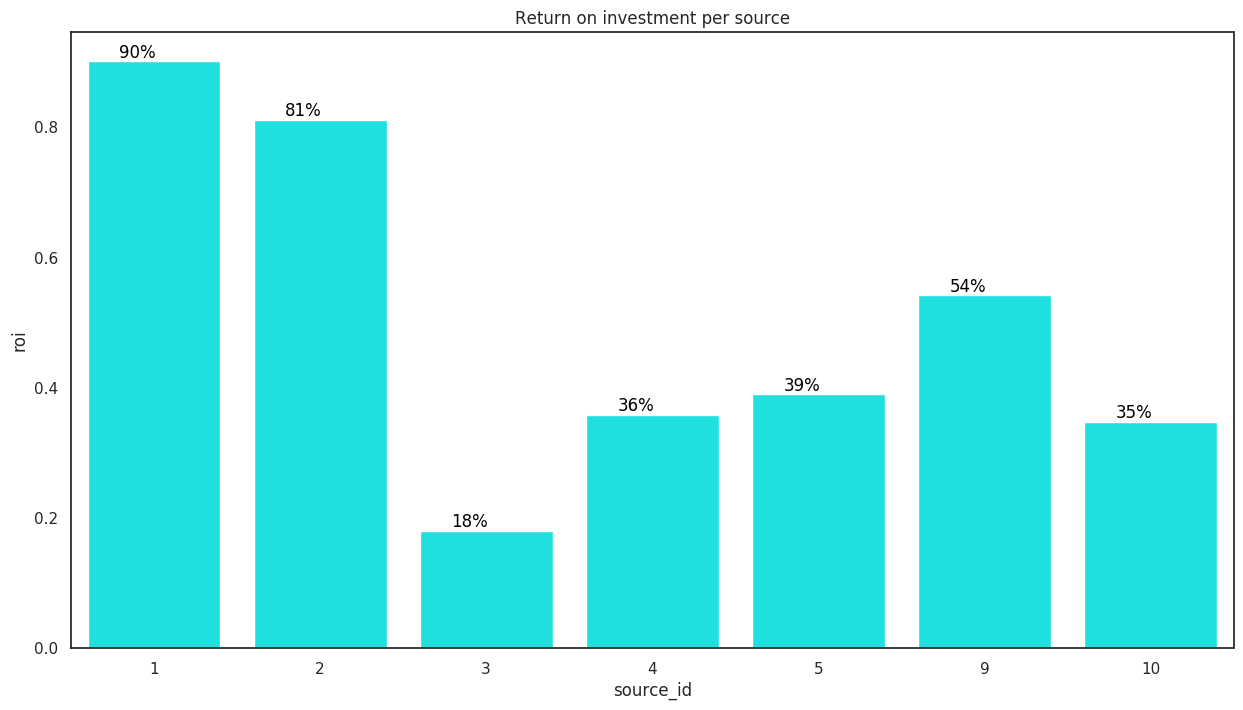

In [194]:
plt.figure(figsize=(15,8))
plt.title('Return on investment per source')
graph = sns.barplot(data=merged_data_actual_source, x='source_id', y='roi', color='cyan')
for p in graph.patches:
    graph.annotate('{:.0%}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black')
plt.show()

**Conclusion:** Return on investment the highest for sources 1 and 2.

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Good, please write general conclusions for this block.
</div>

**General conclusion for 'marketing' block:**

The highest amount of money was spent on sources 3 and 4 and we can see that had an effect in graphs regarding orders.

The highest amount of money was spent on marketing during winter months and it reflects the situation with orders.

Customer aquisition costs was the highest for sources 2, 3 and 1.

Lifetime value turned out to be the highest for sources 1 and 2.

Profit per source was the highest for sources 1 and 2. Source 9 is also profitable, other sources are in the minus.

Return on investment the highest for sources 1 and 2.

**STEP 3. Write a conclusion: advise marketing experts how much money to invest and where.**<a id='conclusion'></a>

Thus, total number of orders by source was the highest for sources 3 and 4 which reflects the money spent on those sources in terms of marketing. 

On the other hand, conversion by source is the highest for sources 1, 2, 10. LTV by source is the highest for sources 1, 2, 9. Profit by source is the highest for sources 1, 2, 9. 

We advice marketing experts to invest money in sources 1, 2 and 9.

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Good, but right now the size of final conclusion does not correspond to the size of the reserach. Please review the study again and prepare a full report. That is the first thing management would read.
</div>

**Full report:**<a id='report'></a>

The percentage of users who are still using the site after one week is 16. The percentage of users who are still using the site after one month is 4.<br>
We can see a sharp peak in daily active usage on the 24th of November 2017 with 3319 active users and a substantial fall on the 30th of March 2018 with 131 active users. Other than that, daily usage appears higher during colder months than during warmer months.<br>
This bar graph confirms the observations taken from daily active users line graph. Colder months evidently correlate with higher number of users of the site.<br>
The difference between touch and desktop is not very dramatic, but still quite noticable. That could be explained by people searching for information about cultural events during their lunch breaks at work where they use desktop computers.<br>
This graph shows that people mostly use the website once a day.<br>
Most sessions last around 60 seconds. The histogram shows that sessions over an hour (3600) are very rare.
The second cohort shows the highest retention. The sixth cohort shoes the lowest.<br>

The percentage of users converted on the first day of interacting with the website is 11%. The graph shows that by the 30th day of interacting with the website nearly 14% of users are converted.<br>
We can see higher rates of conversion for sources 1, 2, 10 and 9.<br>
We can see higher rates of conversion for cohorts 1, 2, 6 and 11.<br>
We can see a peak in the end of November with 814 total orders that corresponds with observations from previous graphs as well as a substantial peak on the 31st of May with 610 total orders.<br>
Although we saw that the day with the highest number of orders was in November, overall December saw the highest number of orders in total.<br>
Sources 3 and 4 show the highest number of monthly orders.<br>
The first cohort shows the highest number of orders during a period of October-December 2017.<br>
The average number of orders was the highest in winter months.<br>
Cohorts 3, 4, 5, 6, 7 and 8 had the highest LTV in September 2017.<br>
On average, each customer from the first cohort brought $3 in revenue over their 12-month liftetime.<br>
Acquiring each customer cost the company an average of 8.9 dollars, while each customer brought in 5.94 dollars. So investment in customer acquisition did not paid off and even led to loss.<br>
Cohorts 3 to 8 got closer to paying of in September 2017, but never actually paid off. Same goes for cohorts 10 and 11 in June 2016.<br>
On average, cohorts never paid off and even got worse.<br>

The highest amount of money was spent on sources 3 and 4 and we can see that had an effect in graphs regarding orders.<br>
The highest amount of money was spent on marketing during winter months and it reflects the situation with orders.
Customer aquisition costs was the highest for sources 2, 3 and 1.<br>
Lifetime value turned out to be the highest for sources 1 and 2.<br>
Profit per source was the highest for sources 1 and 2. Source 9 is also profitable, other sources are in the minus.
Return on investment the highest for sources 1 and 2.<br>

Thus, total number of orders by source was the highest for sources 3 and 4 which reflects the money spent on those sources in terms of marketing.<br>
On the other hand, conversion by source is the highest for sources 1, 2, 10. LTV by source is the highest for sources 1, 2, 9. Profit by source is the highest for sources 1, 2, 9.<br>
We advice marketing experts to invest money in sources 1, 2 and 9.<br>